<a href="https://colab.research.google.com/github/Maxindrull2/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica1_AprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño y entrenamiento de un sistema de redes de neuronas artificiales**

Asignatura: Aprendizaje Automático

Profesor: Carlos Emilio Rabazo Márquez

Grupo: A02

Integrantes: Natalia Iglesias, Sandra Millán y Ángel Pardo



# **Índice:**



1.   Introducción
2.   Cargar los datos
3.   Arquitectura de la red neuronal

>*   Hiperparámetros de la capa oculta
>*   Número total de parámetros entrenables

4.   Representación de la arquitectura de la red
5.   Preparación de datos y etiquetas

>*   Normalización y one hot encoding

5.   Fase de entrenamiento

>*   Pesos sinápticos, épocas, batch size
>*   Actualización parámetros

6.   Verificación de la red neuronal
7.   Generación de predicciones

>*   Imagen 6
>*   Todos los tipos de etiquetas
>*   10 primeras imagenes

8.   Análisis modelos 2 y 7
9.   Mejora del modelo
10.  Conclusiones




# **Introducción:**

Este documento Markdown se centra en la creación y evaluación de diversos modelos de clasificación multiclase diseñados específicamente para clasificar 10 tipos distintos de prendas de ropa. El objetivo principal es la comparación de estos modelos, con el propósito de identificar cuál de ellos se destaca como la solución más eficiente para abordar la problemática en cuestión.

Para llevar a cabo esta comparación, se analizarán detenidamente los hiperparámetros de la capa oculta de los modelos utilizados, los cuales incluyen el número de neuronas(10 o 512), la función de activación (ReLu o sigmoide) y el optimizador (sgd o RMSprop). Además, se llevará a cabo un estudio adicional y análisis de la función Adam, la función de error sparse categorical cross-entropy y el número de épocas empleado en el entrenamiento. Se prestará una atención especial a la posible presencia de sobreentrenamiento entre las épocas 5 y 25. Este análisis exhaustivo permitirá identificar la combinación óptima de hiperparámetros para resolver eficazmente el problema de clasificación de prendas de ropa.

# **Cargar los datos**

En esta práctica, utilizaremos la biblioteca Python Keras para entrenar un modelo de Red de Neuronas Artificiales a reconocer y clasificar imágenes de ropa.

Antes de cargar el conjunto de imágenes que se emplearán, nos aseguramos de estar ejecutando la versión 2.0.0 (o superior) de TensorFlow y se importan las librerias que van a ser requeridas.

In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.initializers import HeNormal, GlorotUniform, RandomNormal
from keras.utils import to_categorical
from matplotlib.colors import rgb2hex

print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


**Cargamos el conjunto de datos FASHION MNIST en Keras**

El conjunto de datos FASHION MNIST se trata de 70K imágenes en escala de grises de prendas individuales de ropa y zapatos, etiquetadas con el nombre de lo que representa. Estas prendas están clasificadas en 10 categorías (entre 0 y 9), cada una representando lo siguiente:


*   0 = T-shirt / top
*   1 = Trouser
*   2 = Pullover
*   3 = Dress
*   4 = Coat
*   5 = Sandal
*   6 = Shirt
*   7 = Sneaker
*   8 = Bag
*   9 = Ankle boot

El modelo se entrenará mediante **aprendizaje automatico supervisado**. De las 70k imágenes, 60k se usarán para entrenamiento. El modelo predecirá para cada imagen la probabilidad de pertenecer a una clase y, posteriormente, lo comparará con su **etiqueta** para ver si ha acertado, es decir, se creará una función que mapea desde las entras hasta las salidas, siendo las salidas categóricas. Este método se conoce como **retropropagacion del gradiente** y permite que la informacion del costo fluya hacia atras a traves de la red para calcular el gradiente. Una vez que se ha aplicado un **patrón** a la entrada de la red como **estímulo**, este se propaga desde la primera capa a traves de las capas siguientes de la red, hasta generar una salida. La señal de salida se compara con la señal deseada y se calcula una señal de error para cada una de las salidas. Las salidas de error entonces se propagan hacia atras, partiendo de la capa de salida, hacia todas las neuronas de la capa oculta que contribuyen directamente a la salida. Sin embargo las neuronas de la capa oculta solo reciben una fracción de la señal total del error, basándose aproximadamente en la contribución relativa que haya aportado cada neurona a la salida original. Este proceso se repite capa por capa, hasta que todas las neuronas de la red hayan recibidio una **señal de error** que describa su contribución relativa al error total.

La importancia de este proceso consiste en que, a medida que se entrena la red, las **neuronas de las capas intermedias se organizan** a sí mismas de tal modo que las distintas neuronas aprenden a reconocer distintas características del espacio total de entrada. Después del entrenamiento, cuando se les presente un patrón arbitrario de entrada que contenga ruido o que esté incompleto, las neuronas de la capa oculta de la red responderán con una salida activa si la nueva entrada contiene un patrón que se asemeje a aquella característica que las neuronas individuales hayan aprendido a reconocer durante su entrenamiento.



Por lo tanto, para formar el conjunto de imágenes de entrenmaiento y de prueba, se crean dos **tuplas**:
* Una tupla con las imágenes y etiquetas de las imágenes de entrenamiento
* Otra tupla igual con las imágenes de prueba

In [2]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

4422102/4422102 [==============================] - 0s 0us/step


A continuación, **comprobamos cómo se han cargado los datos de entrenamiento**:

Vemos que hay 60,000 imágenes, ordenadas de forma aleatoria para evitar ciclos, en el conjunto de entrenamiento y que en cuanto a sus dimensiones, cada imagen viene representada por una matriz de 28x28 píxeles. Cada imagen del conjunto de datos MNIST se representa como una matriz bidimensional donde cada pixel de la imgen es un valor numérico que representa la intensidad del color (escala de grises).

El resto de imágenes se han guardado en las de prueba. Con este conjunto de datos, el modelo ya **no aprende**. Simplemente **predice** a partir de la red ya entrenada.

In [3]:
print(train_images.shape)

(60000, 28, 28)


Representamos la matriz de la imagen 17.
Para mostrar la **matriz** de forma más **legible**, se hace lo siguiente:

*    Se controla la cantidad de decimales que se muestran cuando se imprimen números reales, en este caso 2 decimales (precision=2)
*    Se suprime la notación científica (suppress=True)
* Se ajusta el ancho de línea máximo a 145 caracteres (linewidth=145)

In [4]:
# Vemos la matriz de la imagen número 17 (28x28)

np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[17]))

# La imagen anterior corresponde con una camiseta.
train_labels[17]

[[  0   0   0   0   0   0   0   0   0   0   0  19   4   0   0   0   0   0   0   0   0   1   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  72 157 222 244 252 148 198 200 241 201  46   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  31 200 211 226 224 205 211 242 212 246 245 194 207 212 220 120   0   0   1   0   0   0]
 [  0   0   0   0   0   0 190 217 200 200 198 196 189 178 198 179 164 179 182 183 182 193 196   0   0   0   0   0]
 [  0   0   0   0   0 101 212 196 200 198 198 197 194 187 189 190 186 189 186 183 174 161 175  83   0   0   0   0]
 [  0   0   0   0   0 205 213 200 200 193 194 194 193 189 189 186 189 183 179 171 176 163 171 175   0   0   0   0]
 [  0   0   0   0   0 205 216 205 212 190 191 189 189 187 186 185 185 182 183 180 172 154 164 196  26   0   0   0]
 [  0   0   0   0 157 215 226 244 231 189 183 189 187 186 183 183 183 179 182 180 167 178 198 185  89   0   0   0]
 [  0   0   0   0  49 227 220 254 250 200 185 186 185 185 182 180 182 174 168 16

0

Ahora la camiseta será pintada

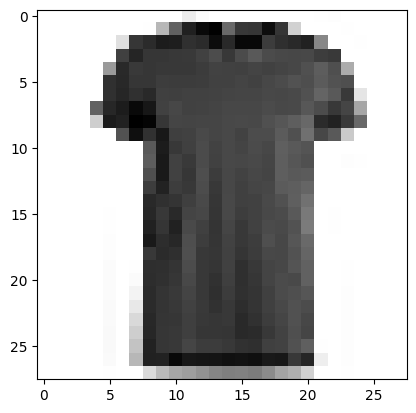

In [5]:
# Veamos el elemento 17 y pintémoslo con matplotlib
digit = train_images[17]  # Esta variable ahora contiene la matriz numérica que representa la imagen numero 17

# cmap=plt.cm.binary se utiliza para representar la imagen en blanco y negro (escala de grises),
# invierte la escala de colores predeterminada para que los píxeles oscuros aparezcan en blanco y los píxeles claros aparezcan en negro.
# Es decir, los valores más bajos en la matriz aparecerán en blanco y los valores más altos aparecerán en negro.
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos que los datos de prueba tienen las dimensiones esperadas (28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

Mostremos otra imagen

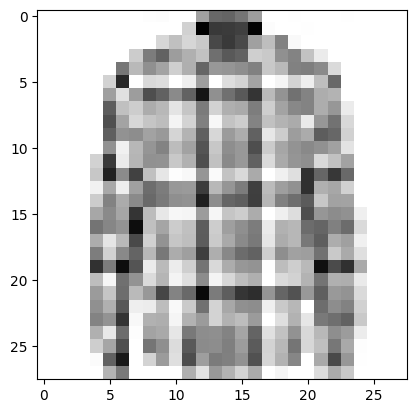

2

In [7]:
# Veamos el elemento 7 de test y pintémoslo con matplotlib
digit = test_images[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


# La imagen anterior corresponde con una camisa.
train_labels[7]

# **Arquitectura de la red neuronal**

Una vez procesados los datos, comenzamos a crear la red neuronal, las neruronas se agrupan y se conectan formando redes que se activan para realizar diversas funciones como la clasificación y reconocimiento de prendas de ropa.

A la hora de construir la red, se nos pide crear **8 modelos** distintos combinando diferentes tipos de la funcion de activación, optimizador y número de neuronas en las capas ocultas. El número de neuronas no se puede modificar en la última capa, pues esto no es algo que nosotros podamos decidir, sino que lo decide el algoritmo según el problema.

En cuanto a la **inicialización de pesos**, en vez de inicializar de manera aleatoria los pesos, lo hacemos según una distribución concreta.
* Para el caso donde la función de activación es **ReLU**, usamos la inicialización de Kaiming o **HeNormal**. La inicialización HeNormal se basa en la idea de que es importante tener unos pesos iniciales de manera que la propagación hacia adelante y hacia atrás a través de la red se mantenga en un rango óptimo. Utiliza una distribución normal (gaussiana) para inicializar los pesos con una media de 0 y una desviación estándar calculada como la raíz de dos entre el número de neuronas. De esta forma, se logra una propagación de señal más eficiente a través de la red, lo que puede ayudar a evitar que los gradientes se vuelvan demasiado pequeños o demasiado grandes durante el entrenamiento (Desvanecimiento del gradiente). Esto a su vez puede acelerar la convergencia y mejorar el rendimiento de la red. Por lo tanto, la razón principal es que estas funciones introducen no linealidades en el modelo al activar ciertas neuronas y desactivar otras.

* Para la de  la función de activación **sigmoid**, usamos la inicialización de Xavier o **GlorotUniform**, una inicialización que es más versátil y se puede utilizar con una variedad de funciones de activación. Se utiliza específicamente en capas densas o completamente conectadas. Trata de ajustar los valores iniciales de los pesos de manera que las activaciones en la red no se vuelvan demasiado pequeñas o demasiado grandes durante el entrenamiento, ayudando con la convergencia.

La **diferencia principal entre estas dos distribuciones** es cómo ajustan la varianza de los pesos iniciales. GlorotUniform tiene en cuenta tanto el número de entradas como el número de salidas de la neurona, lo que la hace más adecuada para funciones de activación con respuesta cercana a la unidad (como en este caso sigmoid, la cual tiene salidas en el rango (0, 1) ). HeNormal se centra solo en el número de entradas y es especialmente efectiva con funciones de activación ReLU. Por eso asignamos distintas inicializaciones según la función de activación que tenemos.

Una vez hemos definido la forma de inicializar los pesos, lo primero que hacemos es crear un **modelo sequencial** al que llamaremos Zalando. En dicho modelo, crearemos la capa de entrada, la capa oculta y la capa de salida. En la capa de entrada, se emplea la función **flatten** de keras para convertir los imágenes multidimensionales en una única dimensión. De esta forma, para cada imagen, en vez de tener una matriz de 28x28 tendremos un vector unidimensional de 784 elementos. Esta función es importante, pues las capas densas requieren que la entrada de los datos sean unidimensionales.

A la capa de salida, se le pasa la función de activacion **softmax** (función de probablidad) de 10 neuronas. Como resultado, devolverá una matriz con 10 valores que sumarán en total 1, representando cada posición la probabilidad de que la imagen pertenezca a cada una de nuestras clases definidas. Además, la probabilidad de que una imagen sea una prenda u otra reside en los pesos.

En los 8 modelos que estamos utilizando, se emplea la **función de error** conocida como **"categorical_crossentropy"**. Esta función requiere que las etiquetas de nuestro conjunto de datos se representen en un formato denominado **"one-hot encoding"**, donde cada etiqueta se convierte en un vector binario. La función "categorical_crossentropy" se utiliza para cuantificar la diferencia entre las etiquetas predichas por el modelo (denominadas como y') y las etiquetas reales (denominadas como y).

El cálculo de esta función se basa en la entropía cruzada (cross-entropy) y se expresa mediante la fórmula L(y, y') = -∑(y(i) * log(y'(i))), donde:

* L(y, y') representa la pérdida de entropía cruzada.
* y(i) denota la probabilidad real de que un ejemplo pertenezca a la clase i.
* y'(i) denota la probabilidad predicha por nuestro modelo para la misma clase i.

A continuacion, se le aplica a la **función de error** un modelo de **optimizacion**. De esta forma se minimiza la función de error para encontrar los puntos donde la derivada sea cero, es decir, que se encuentre un mínimo o máximo. Por eso se quiere hallar el mínimo, pues es el momento en el cual el error es menor y el sistema ha aprendido.

ZalandoX es una lista donde se guardan los 8 modelos creados.

## Hiperparámetros de la capa oculta
**Hiperparámetros:** es todo aquello que podemos modificar o ajustar para alterar el desempeño de la red.


**Nºneuronas**: número de neuronas de la capa oculta depende de la complejidad del problema.


1.   10: mejor para problemas más sencillos y con un número de características bajo. Sin embargo, el defecto de neuronas puede llevar a un subajuste (*underfitting*),donde una red con muy pocas neuronas puede tener dificultades para capturar la complejidad de los patrones presentes en los datos.

2.   512: mejor para problmeas de complejos y con un número de características más elevado. Aunque, un número excesivo de nueronas puede llevar a un sobreajuste (*overfitting*), donde la red se adapta demasiado a los datos de entrenamiento y tiene dificultades para generalizar a nuevos datos.

**Función de activación**:



1.   Relu: función que generará una salida igual a cero cuando la entrada (z) sea negativa,  y una salida igual a la entrada cuando dicha esta última sea positiva. Es utilizada por su gran eficiencia de cómputo y por no tener problemas de saturación. Sin embargo, si puede tener problemas como el 'dying ReLU'neuronas que siempre devuelven 0.

2.   Sigmoid: esta función de activación toma cualquier rango de valores a la entrada y los mapea al rango de 0 a 1 a la salida. Se suele utilizar en redes donde la clasificación sea binaria, ya que suele tener problemas de saturación (se satura a 1 cuando la entrada (z) es muy alta, y a 0 cuando es muy baja). Esto repercute en problemas como el desvanecimiento del gradiente.

**Optimizador**:



1.   Sgd: método básico de optimización, calcula el gradiente de la función de pérdida con respecto a los parámetros (pesos) para un pequeño subconjunto de datos de entrenamiento (lote) en cada iteración. Actualiza los pesos en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje.
>> W = W - α*ΔW

>* Adaptación de la Tasa de Aprendizaje:  constante (fija), se debe ajustar manualmente
> *   Manejo de Variaciones en la Escala de los Gradientes: sensible a las variaciones en la escala de gradiente
> *   Curvas de Aprendizaje: converge lentamente en curvas de pérdidas complejas


2.   RMSprop: algoritmo de optimización utilizado en el entrenamiento de modelos de aprendizaje automático. Su característica principal es adaptar la tasa de aprendizaje para cada parámetro individualmente, utilizando una media móvil ponderada de los cuadrados de los gradientes históricos.

>> C = C + d*C*(1-d)*(ΔW)^2

>> W = W - (α*ΔW/sqrt(C + s))

d = tasa de descomposición/decadencia (las entradas anteriores influyen considerablemente menos que las nuevas)

>* Adaptación de la Tasa de Aprendizaje: Ajusta automáticamente la tasa de aprendizaje según la información acumulada sobre los gradientes anteriores.
> *   Manejo de Variaciones en la Escala de los Gradientes: Escala los gradientes antes de actualizar los pesos
> *   Curvas de Aprendizaje: converge rápido, debido al descenso de grdaiente, lo que permite adaptarse a curvas de pérdidas complejas






In [8]:
# DATOS DEL PROBLEMA
activacion = ['relu', 'sigmoid']
optimizador = ['sgd', 'rmsprop']
cantidadModelos = 8
nNeuronas = [10, 512]

In [9]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
# es mejor relu para capas ocultas y sigmoid para capas de salida

initializer_second_layer = RandomNormal(mean=0.0, stddev=0.01)
inicializacion = [HeNormal(),GlorotUniform()]

zalandoX = []

i = 0
for neu in range(0,len(nNeuronas)):
  for act in range(0,len(activacion)):
    for opt in range(0,len(optimizador)):
      zalando = Sequential() # creamos un modelo secuencial que va de capa en capa (a la siguiente, sin volver hacia atras)

      # CREAMOS CAPAS
      # CREAMOS CAPA ENTRADA
      zalando.add(Flatten(input_shape=(28*28,)))
      # CREAMOS CAPA OCULTA
      zalando.add(layers.Dense(nNeuronas[neu], activation = activacion[act], kernel_initializer = inicializacion[act]))
      # CREAMOS CAPA SALIDA
      zalando.add(Dense(10, activation='softmax')) # 10 = NUMERO ETIQUETAS

      # PASAMOS OPTIMIZADOR
      zalando.compile(loss='categorical_crossentropy',
                    optimizer= optimizador[opt], metrics=['accuracy'])

      print(f"Modelo {i + 1}: Activation={activacion[act]}, Optimizer= {optimizador[opt]}, Neurons={nNeuronas[neu]}")
      zalando.summary()  # Imprime el resumen del modelo
      zalandoX.append(zalando)
      i = i + 1




Modelo 1: Activation=relu, Optimizer= sgd, Neurons=10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 2: Activation=relu, Optimizer= rmsprop, Neurons=10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 4: Activation=sigmoid, Optimizer= rmsprop, Neurons=10
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Modelo 6: Activation=relu, Optimizer= rmsprop, Neurons=512
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 7: Activation=sigmoid, Optimizer= sgd, Neurons=512
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 

En este resumen(summary), podemos observar la composición de nuestros modelos. Todos ellos incluyen las tres capas creadas. La primera de ellas es un "flatten," que no posee parámetros y tiene una salida de 784, que corresponde al vector que contiene la información de la imagen proporcionada.

Luego, sigue una capa que varía según el modelo. Hay dos tipos disponibles, uno con 10 neuronas y otro con 512 neuronas. Los modelos con 10 neuronas tienen 7,850 parámetros y una salida de 10, que corresponde al número de neuronas. Mientras que los modelos con 512 neuronas cuentan con 401,920 parámetros y una salida de 512, en concordancia.

Por último, encontramos la capa de salida, que es idéntica en todos los modelos. Está compuesta por 10 neuronas que representan la probabilidad de pertenencia a cada clase, lo que significa que el número de neuronas en esta capa coincide con el número de clases posibles. En el caso de modelos con 10 neuronas en la capa oculta, esta capa de salida tiene 110 parámetros. Por otro lado, en el caso de modelos con 512 neuronas en la capa oculta, la capa de salida tiene 5,130 parámetros debido a un mayor número de conexiones interneuronales.

# **Número total de parámetros entrenables**
Para calcular el total de parámetros entrenables que se pueden observar en las tablas anteriores, se suman los parámetros de la primera capa densa y los de la segunda capa densa. La primera capa de la red tiene cero parámetros entrenables. Esto es porque la capa de entrada se utiliza para propocionar datos de entrada a la red, no tienen ningún parámetro entrenable. Simplemente transmiten los datos de entrada sin realizar ninguna operación.

**En el caso de tener 512 neuronas:**

La primera capa densa tiene 784 pixeles y 512 neuronas. Pero ademas, cada neurona tiene un sesgo que tambien es un parámetro entrenable (umbral de cada neurona). Por lo tanto, se suman tantos sesgos como número de neuronas que haya. La siguiente capa tiene 512 neuronas de entrada (las neuronas de la capa anterior) y 10 neuronas en la capa de salida, ya que tenemos 10 clases distintas. También se le suman sus sesgos a estas 10 neuronas. Por lo tanto, el total de parámetros entrenables se obtiene mediante los siguientes cálculos:
* (784)*(512) + 512 = 401920
* (512)*(10) + 10 = 5130
* 401920 + 5130 = 407050

**En el caso de tener 10 neuronas:**
Ocurre lo mismo que explicado para 512 neuronas
* (784)*(10) + 10 = 7850
* (10)*(10) + 10 = 110
* 7850 + 110 = 7960


.
# Representacion de la arquitectura de la red

En nuestra red creada tenemos tres capas. Al graficarlo salen cuatro. Esto es porque la representación no representa el número total de capas sino los cambios que estas van sufriendo. Por eso, podemos ver que el input y output de las dos primeras es el mismo porque en realidad están representando a la misma capa (la capa de entrada).**"Input layer" y "flatten"** representan la misma etapa de preprocesamiento de datos en la red neuronal, donde se toman los datos de entrada y se les da la forma adecuada para el siguiente procesamiento.

"Input layer" representa la capa de entrada de la red neuronal donde los datos de entrada se reciben y se preparan para el procesamiento posterior, mientras que la aplanación (flatten) es cuando se convierten los datos multidimensionales (como imágenes) en un formato adecuado para las capas densas de después.

En el **modelo 6**, que es el que se ha graficado concretamente, vemos que en la primera etapa entran 784 pixeles y salen esos 784 pixeles a la primera capa densa. Esta recibe como input los 784 pixeles y como output pasa 512 neuronas a la segunda capa densa. Por eso, la última capa recibe 512 neuronas como input. El 10 que devuelve se debe al número de clases que hay.

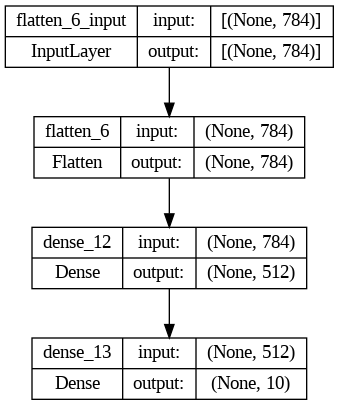

In [10]:
keras.utils.plot_model(zalandoX[6], "zalando_arquitectura.png", show_shapes=True)


# **Preparación de datos y etiquetas**

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Normalización
La normalización de los datos antes de entrenar al red ayuda a estabilizar y acelerar el proceso de entrenamiento de una red neuronal, al ayudar a converger a la función de optimizacion

Al normalizar los datos, se evitan problemas de **convergencia** lenta o inestabilidad numérica que pueden ocurrir si los datos tienen escalas muy diferentes. Además, al reducir la **variabilidad** en las escalas de las características, el modelo puede aprender relaciones más significativas entre las características y generalizar mejor a datos que no ha visto antes.

Al redimensionar las imágenes y luego normalizar los valores de píxeles en el rango [0, 1] nos aseguramos de que los datos estén en un formato adecuado y normalizado antes de entrenar el modelo. Trabajamos con datos de imágenes en escala de grises, donde los valores originales de píxeles están en el **rango** [0, 255]. No se usan datos con valores que sean mucho más grandes que los valores de los pesos de la red, o datos que sean heterogéneos de rango entre ellos para facilitarla convergencia. Cuando normalizamos los valores de píxeles **dividiendo entre 255**, todos los valores estarán en el rango [0, 1].
Además, tiene sentido realizar estos pasos cuando se tiene una función de activación sigmoide en la capa de salida, ya que la sigmoide produce salidas en el rango [0, 1].

En cuanto a la dimension de los datos, los convertimos de matriz 28x28 a un vector unidimensional.

In [12]:
# Preparación los datos y etiquetas de entrenamiento
# PROBABILIDAD DE COLOR (1 = negro y 0 = blanco)

train_images = x_train.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [13]:
# Preparación los datos y etiquetas de prueba
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Preparar etiquetas - One hot encoding
Codificamos categoricamente las etiquetas. Usaremos el **one-hot encoding**, que consiste en transformar las etiquetas en un vector de tantos ceros como el número de etiquetas tenga, con el valor de 1 en el índice que le corresponde al valor de la etiqueta.

Es decir, si antes teníamos una prenda de ropa cuya etiqueta decía que pertenecia a la clase 3, ahora su etiqueta será un vector donde aparezca un 1 en la posición de la clase 3, y ceros en las demás posiciones.

La función to_categorical convierte los datos en formato one hot encoding

In [14]:
# 6.- PREPARACIÓN LAS ETIQUETAS

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
train_images.shape

(60000, 784)

#**Fase de entrenamiento**

Teniendo en cuenta los conceptos que se explicarán a continuacion, se entrena los 8 modelos que se han creado y guardado en ZalandoX. En cada iteración, la red computará los gradientes de los pesos en relación con la pérdida en el lote y ajustará los pesos en consecuencia.


#Pesos sinápticos
En el entrenamiento, los pesos sinápticos (transmisión de neurotransmisores) se irán ajustando para conseguir una mejor predicción que reduzca el error. Un peso muy alto o muy bajo no significa que sea mejor; depende de cada problema. Es importante que el valor de estos pesos se encuentre en un rango  que sea **generalista** para que el modelo conteste bien, no solo con los datos de entrenamiento, sino también con los que nunca haya visto.

En la **matriz de pesos**, cada columna representará las neuronas de entrada y cada fila las de salida. Estos serán los valores que se vayan modificando, no los de la función.


# Épocas
Para entrenar el modelo, definimos el número de épocas como 5, es decir, que el algoritmo recorrerá todo el conjunto de datos de entrenamiento 5 veces completas durante dicho proceso. En cada una de las épocas, el algoritmo verá todas las imágenes de entrenamiento una vez. Esto es importante porque durante cada época, la red neuronal ajustará sus pesos en función de cómo se ajustan las predicciones a las etiquetas reales en el conjunto de datos. Con múltiples épocas, la red tiene la oportunidad de mejorar sus predicciones a medida que ve los datos repetidamente. Esto permite que el modelo aprenda y mejore su rendimiento.

# Sobreentrenamiento
Sin embargo, aunque el número de epocas ayuda a mejorar el rendimiento, si es muy alto también puede provocar sobreentrenamiento. Esto consiste en que si dejamos que el algoritmo de mucha vueltas con los mismos datos de entrenamiento, entonces pierde la generalidad y solo acierta bien esos datos.

# Tamaño de lote (batch size)
El tamaño de minilote es otra forma de evitar el sobreentrenamiento. En esta red, creamos paquetes de 128 imágenes para no actualizar el error imagen a imagen sino de varias en varias. Esto es beneficioso en terminos de eficiencia computacional (las actualizaciones de los pesos son más frecuentes manteniendo el uso de operaciones vectorizadas) y sobreentrenamiento, ya que es un equilibrio entre descenso de gradientes en lotes y descenso de gradiente estocástico, es decir, es la aplicación de un descenso de gradiente en lote a subconjutnos pequeños de datos.

# Número de veces que esta red actualiza el numero de parametros
60 000 / 128 = 468,75 que se aproxima a 469 veces
469*5 = 2345

Si tengo 60 000 imágenes que se actualizan / evalúan en paquetes de 128, lo divido para ver cuantos paquetes hay. Además, como hay 5 epocas, cada paquete se va a evaluar 5 veces.

In [15]:
def plot_compare_accs(history, title="Grafica de precisión"):
    colores_rgb = [
        (255, 0, 0),    # Rojo
        (0, 255, 0),    # Verde
        (0, 0, 255),    # Azul
        (255, 255, 0),  # Amarillo
        (255, 0, 255),  # Magenta
        (0, 255, 255),  # Cian
        (128, 0, 128),  # Púrpura
        (128, 128, 128) # Gris
    ]

    for i in range(cantidadModelos):
        normalized_color = [comp / 255.0 for comp in colores_rgb[i]]
        color_hex = rgb2hex(normalized_color)
        plt.plot(history[i].history['accuracy'], color=color_hex, label=f'Modelo {i + 1}')

    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()

def plot_compare_loss(history, title="Grafica de pérdida"):
    colores_rgb = [
        (255, 0, 0),    # Rojo
        (0, 255, 0),    # Verde
        (0, 0, 255),    # Azul
        (255, 255, 0),  # Amarillo
        (255, 0, 255),  # Magenta
        (0, 255, 255),  # Cian
        (128, 0, 128),  # Púrpura
        (128, 128, 128) # Gris
    ]

    for i in range(cantidadModelos):
        normalized_color = [comp / 255.0 for comp in colores_rgb[i]]
        color_hex = rgb2hex(normalized_color)
        plt.plot(history[i].history['loss'], color=color_hex, label=f'Modelo {i + 1}')

    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()

In [16]:
history = [0]*cantidadModelos
for i in range(0,cantidadModelos):
  print("----------------Modelo",i+1,"--------------------------------------------------------")
  history[i] = zalandoX[i].fit(train_images, train_labels, epochs=5, batch_size=128)



----------------Modelo 1 --------------------------------------------------------
Epoch 1/5
469/469 [==============================] - 10s 5ms/step - loss: 1.5252 - accuracy: 0.5250
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.8972 - accuracy: 0.7177
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.7134 - accuracy: 0.7653
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.6435 - accuracy: 0.7853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6018 - accuracy: 0.7976
----------------Modelo 2 --------------------------------------------------------
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.8819 - accuracy: 0.6999
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5265 - accuracy: 0.8201
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4763 - accuracy: 0.8363
Epoch 4/5
469/469 [========================

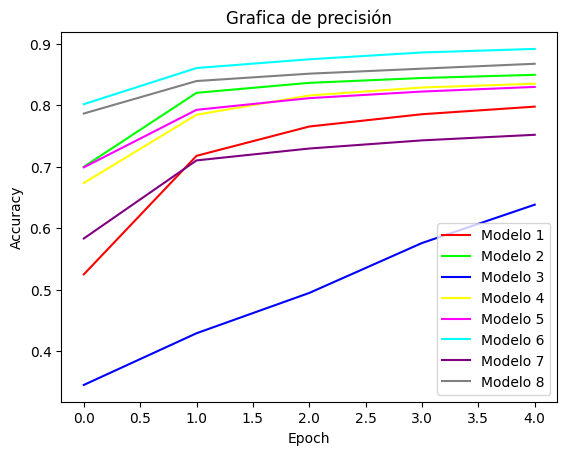

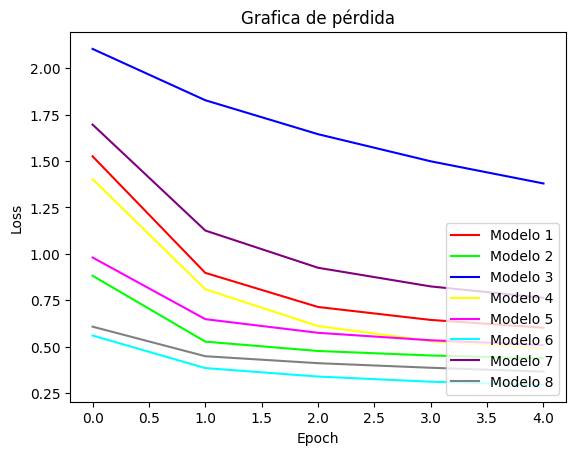

In [17]:
plot_compare_accs(history)
plot_compare_loss(history)

Al entrenarlo obtendremos dos valores: el de pérdida (loss) y el de precisión (accuracy). La **precisión** es el porcentaje / proporción de aciertos. La **pérdida** mide como de bien se ajustan las predicciones de la red a las etiquetas verdaderas. Cuanto menor sea la pérdida, mejor será el rendimiento del modelo. El **objetivo** del entrenamiento de la red es minimizar la pérdida.
Obtendremos estos dos valores en cada epoca.

A continuación, analizaremos los valores de pérdida y precisión del **modelo 5**. En la primera época, el valor inicial de la pérdida era aproximadamente 0.9877. Sin embargo, a medida que se actualizan los pesos en cada iteración, la pérdida mejora y disminuye hasta alcanzar 0.5065. Al mismo tiempo, a medida que la pérdida disminuye, la precisión también mejora, aumentando de 0.7017 a 0.8304.

Como se puede observar en  las gráficas de pérdida y precisión, en las **primeras iteraciones** la **pérdida baja muy rápidamente** y la
**precisión mejora mucho**. Esto se debe a varias razones.
Al comenzar el entrenamiento, los pesos de la red se inicializan de manera aleatoria. En este primer momento, la red no tiene ninguna información sobre cómo ajustar los valores. En las primeras iteraciones, la red puede aprender características útiles y generalizar relativamente bien en el conjunto de entrenamiento. Así, la red ajusta sus pesos de manera más significativa para adaptarse a los datos de entrenamiento, lo que conduce a mejoras notables en la precisión y la pérdida.

Por otra parte, en las primeras iteraciones los **gradientes pueden ser más grandes** porque la red está lejos de la convergencia. Esto impulsa actualizaciones de peso más grandes, lo que puede acelerar la convergencia inicial. Sin embargo, a medida que el entrenamiento avanza y la red se acerca a una solución, los gradientes tienden a disminuir, lo que resulta en actualizaciones de peso más pequeñas.

Además, la red neuronal suele aprender más rápido al principio del entrenamiento. A medida que se acerca a una **solución óptima, el proceso de aprendizaje se vuelve más lento**, ya que la red necesita ajustar los pesos con mayor precisión.

# **Verificación**

Verificamos si nuestro modelo funciona correctamente para datos que no ha visto nunca (las 10k imagenes de prueba). En este paso, el modelo no te devuelve la predicción de la clase a la que pertenece la imagen, sino la pérdida y precisión para poder evaluar el rendimiento global del modelo. Para obtener detalles sobre las predicciones individuales de cada imagen, habría que hacerlo por separado.

Aquí podremos ver si hay sobreentrenamiento, pues si la precisión de las imágenes de entrenamiento es mayor que la precisión de las imágenes de prueba, entonces habría sobreentrenamiento. En este modelo, hay algún caso en el que la precisión es ligeramente mayor o ligeramente menor, pero la mayoría son valores muy similares, por lo que podráamos concluir que no hay sobreentrenamiento.

In [18]:
  # 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss = [0]*cantidadModelos
test_acc = [0]*cantidadModelos
for i in range(0,cantidadModelos):
    print("Verificacion...Modelo",i+1,".........................................................")
    test_loss[i], test_acc[i] = zalandoX[i].evaluate(test_images, test_labels)

Verificacion...Modelo 1 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.6063 - accuracy: 0.7918
Verificacion...Modelo 2 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.8413
Verificacion...Modelo 3 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 1.3329 - accuracy: 0.6495
Verificacion...Modelo 4 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.8261
Verificacion...Modelo 5 .........................................................
313/313 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.8229
Verificacion...Modelo 6 .........................................................
313/313 [==============================] - 1s 2ms/step - loss: 

Esta evaluación permite la realización de una comparación entre diversos modelos. De los ocho modelos objeto de análisis, destaca la eficacia de los Modelos 6 y 8, que exhiben niveles de precisión en torno al 0.85 en términos de exactitud. Inmediatamente por debajo, en el umbral del 0.82, se encuentran los Modelos 2, 4 y 5, los cuales presentan un rendimiento ligeramente inferior.

En contraposición, los Modelos 1 y 7 manifiestan un desempeño notablemente inferior, evidenciando valores de precisión comprendidos entre 0.7 y 0.8, mientras que el Modelo 3 ostenta el rendimiento más modesto, con una precisión inferior al 0.7.

En última instancia, es importante notar que ninguno de los modelos alcanza la eficacia necesaria para considerarse un predictor sólido de prendas, ya que se esperaría una precisión cercana a 1 para tal clasificación. Esto indica la necesidad de continuar mejorando estos modelos para lograr resultados más precisos en la predicción de prendas.

## **GENERACIÓN DE PREDICCIONES**
1. Verificamos y evaluamos la calidad de las predicciones para la imagen 6
2. Realizar predicciones sobre la imagen 6º imagen de test con los 8 modelos
3. Realizar predicciones sobre todas las imagenes de todos los tipos de etiquetas con los 8 modelos
4. Realizar predicciones sobre las 10 primeras imágenes con los 8 modelos

En el siguiente código se realizarán predicciones en un conjunto de imágenes de prueba (`test_images`) mediante un bucle que itera sobre varios modelos.  En cada iteración, se imprime información sobre las predicciones realizadas por el modelo correspondiente. El enfoque se centra particularmente en el sexto elemento de las predicciones, con la expectativa de que este elemento debería ser clasificado como 1 (Trouser).

La función `np.argmax(prediciones[5])` se utiliza para encontrar el índice de la predicción con el valor máximo para el sexto elemento. Además, se imprime la suma de todas las predicciones para este mismo elemento y así verificamos que es 1 (el conjunto de probabilidades suma el 100%). Estos pasos pueden considerarse como medidas de verificación y evaluación de la calidad de las predicciones. Finalmente, se imprime el conjunto completo de predicciones para el conjunto de imágenes de prueba, lo que proporciona una visión general de las salidas del modelo.


In [19]:


# Hacemos las predicciones con las imágenes de Test
for i in range(0,cantidadModelos):
    print("Verificacion...Modelo",i+1,".........................................................")
    prediciones = zalandoX[i].predict(test_images)

    print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
    print(prediciones[5])
    print("=======================================================================")
    print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
    print(np.argmax(prediciones[5]))
    print("=======================================================================")
    print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
    print(np.sum(prediciones[5]))
    print("=======================================================================")
    print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
    print(prediciones)

Verificacion...Modelo 1 .........................................................
313/313 [==============================] - 1s 3ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
1.0
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.2  0.01 0.58]
 [0.   0.   0.87 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.08 0.   0.   ... 0.   0.77 0.  ]
 [0.   0.96 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.25 0.03 0.09]]
Verificacion...Modelo 2 .........................................................
313/313 [==============================] - 0s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.01 0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENT

Esta función se utiliza para mostrar una imagen junto con información sobre la predicción del modelo y la etiqueta verdadera, y colorea la etiqueta del eje X según si la predicción fue correcta o no.

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #La función ('inshow') de Matplotlib permite mostrar imagenes, en este caso en
  # escala de grises, ya que el mapa de color ('cmap') es ('plt.cm.binary'),
  # donde 0 es negro y 1 es blaco, utilizando así que las imagenes están en forma
  # de porcentajes.
  plt.imshow(img, cmap=plt.cm.binary)

  # La función ('argmax') de Numpy, devuelve el indice del valor máximo en el array
  # , lo que significa que ('predicted_label') ahora contiene la etiqueta predicha.
  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  # La siguinte función de Matplotlib establece la etiqueta del eje X de la imagen,
  # la etiqueta consta de tres numeros:
  # 1 - Mustra la opción de la etiqueta de la imagen predicha por el modelo
  # 2 - Muestra en porcentaje de acierto de la imagen
  # 3 - Muestra el numero de la etiqueta correcta
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

Esta función crea un gráfico de barras que representa las predicciones de un modelo para una muestra específica. Colorea la barra predicha en rojo y la barra correspondiente a la etiqueta verdadera en negro, lo que facilita la visualización de la calidad de las predicciones del modelo.

In [21]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  # La siguiente función de la biblioteca 'matplotlib' crea un gráfico de barras
  # con 10 barras (nº de etiquetas), donde las alturas estan dadas por los
  # los valores ('predictions_array'), siendo todas de color verde, menos
  # el valor de la etiqueta, que en caso de coincidir con el valro de la prediccion
  # es negra, y en caso contrario, la barra de la etiqueta sera negra y la
  # predicción roja
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  # Implementaremos 00FF00 en vez de 777777, para poder visualizar mejor los porcentajes
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

# Imagen 6:
Realizacion de la predicción para la imagen 6 (es decir, posición 5 de los arrays que guardan tanto las imagenes como las etiquetas) por los 8 modelos.

Verificacion...Modelo 1 .........................................................
313/313 [==============================] - 0s 1ms/step


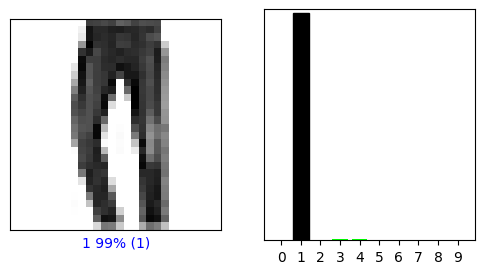

Verificacion...Modelo 2 .........................................................
313/313 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

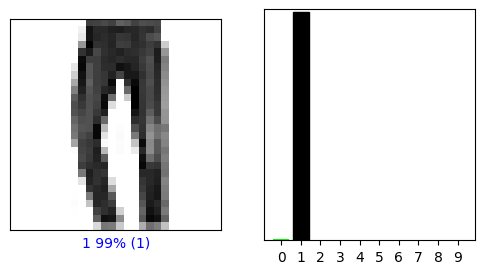

Verificacion...Modelo 3 .........................................................
313/313 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

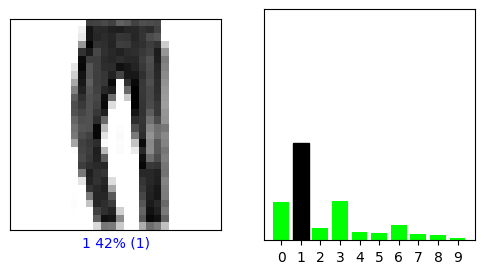

Verificacion...Modelo 4 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

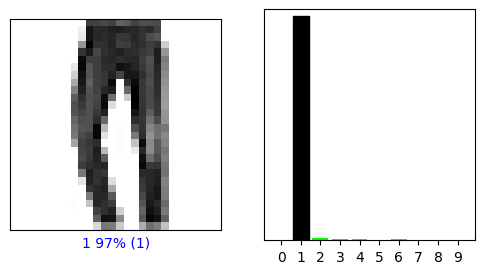

Verificacion...Modelo 5 .........................................................
313/313 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

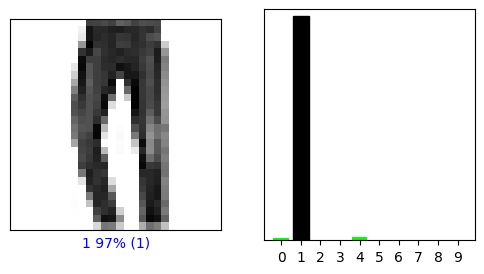

Verificacion...Modelo 6 .........................................................
313/313 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

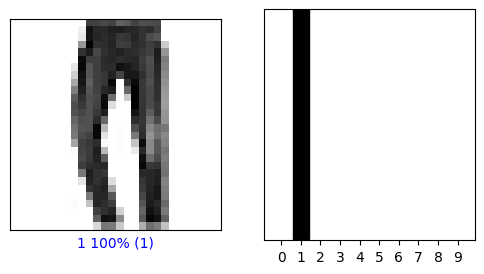

Verificacion...Modelo 7 .........................................................
313/313 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

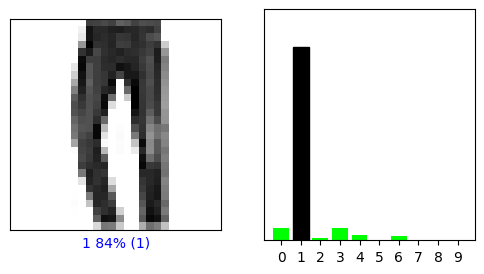

Verificacion...Modelo 8 .........................................................
313/313 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

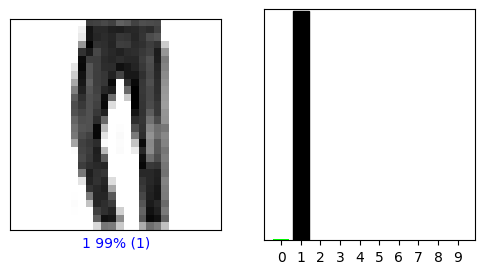

<Figure size 640x480 with 0 Axes>

In [22]:
for i in range(0,cantidadModelos):
    print("Verificacion...Modelo",i+1,".........................................................")
    prediciones = zalandoX[i].predict(test_images)

    j = 5
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(j, prediciones[j], y_test, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(j, prediciones[j],  y_test)
    plt.show()
    plt.clf()

Una vez visualizado los datos y las gráficas, podemos observar la calidad de los modelos para la predicción de la sexta imagen. Todos ellos utilizan **la generalización** facultad de las redes neuronales apra responder apropiadamente cuando se le presentan datos que no habían sido presentados anteriormente.

Los modelos que utilizan el **optimizador** ('rmsprop'), en generla suelen acertar más en sus predicciónes, mientras que los modelos con el optimizador ('sgd') suele tener un porcentaje mayor de fallos debido a que no se ajustan de forma automática.

En cuanto al **número de neuronas** se puede observar que un número mayor de nueronas favorece a la red al reducir el porcentaje de fallo, asi no se produce un subajuste, (el caso 3 y el 7, similares donde la unica diferencia es el nuemro de neuronas en la capa oculta, podemos observar que el porcentaje de fallo se reduce hasta un 40% ).

Por último, las conlcusiones en cuanto a **la función de activación**, podemos observar que la función ('relu') es significativamente mejor que la función ('sigmoid') para este problema, al no producirse en la primera un problema de saturación.

Para observar como interactuan las diferentes funciones de activación, optimizador y número de neuronas hemos creado una tabla, donde el color rojos represntan una peor predicción y el color verde una mejor predicción para la imagen 6.


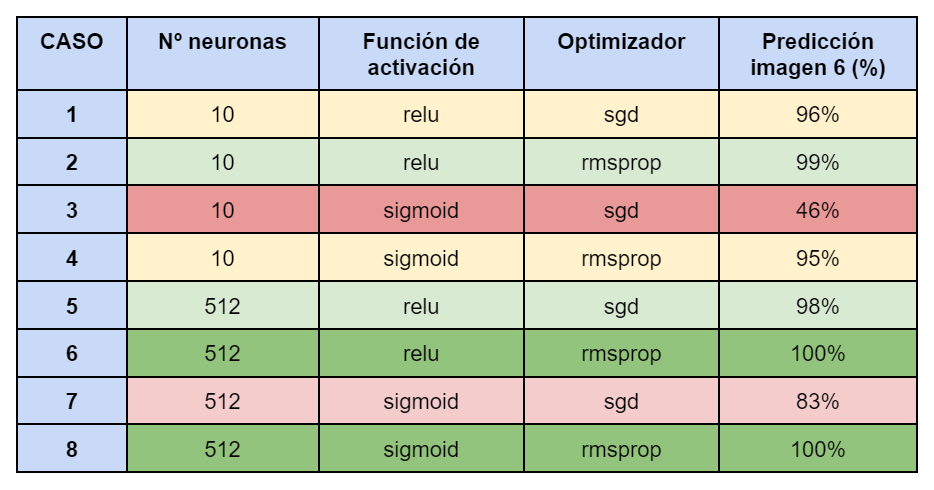

# Todos los tipos de etiquetas
Realizacion de la predicción para todos los tipos de etiquetas por los 8 modelos.

............................................................................
Verificacion...Modelo 1 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


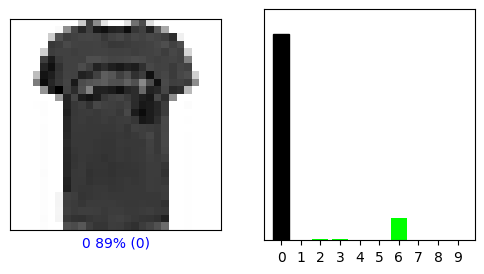

<Figure size 640x480 with 0 Axes>

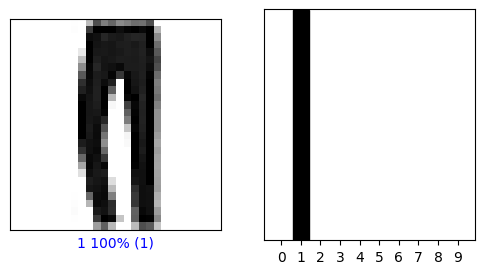

<Figure size 640x480 with 0 Axes>

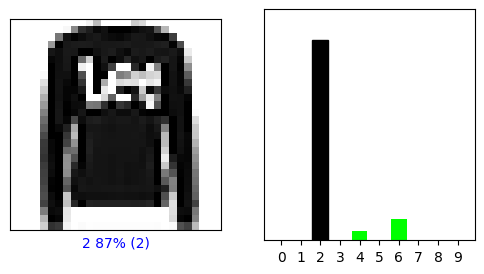

<Figure size 640x480 with 0 Axes>

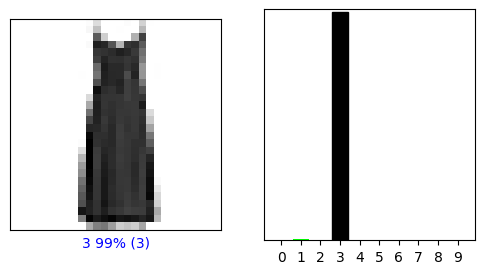

<Figure size 640x480 with 0 Axes>

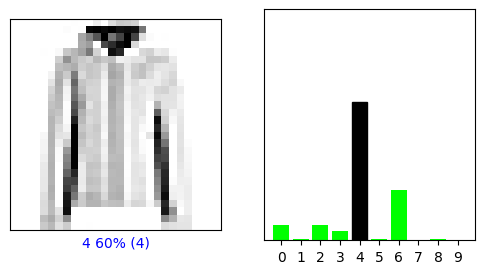

<Figure size 640x480 with 0 Axes>

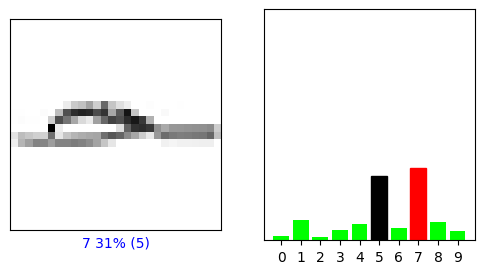

<Figure size 640x480 with 0 Axes>

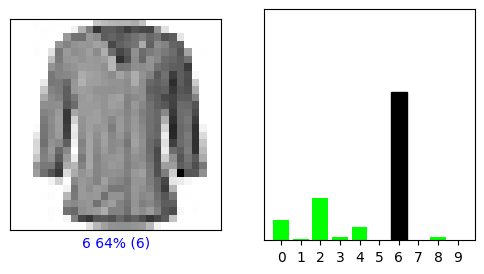

<Figure size 640x480 with 0 Axes>

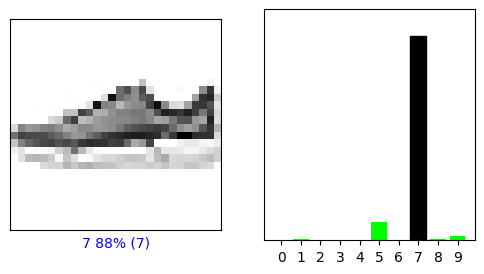

<Figure size 640x480 with 0 Axes>

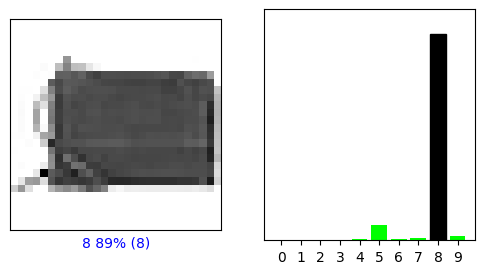

<Figure size 640x480 with 0 Axes>

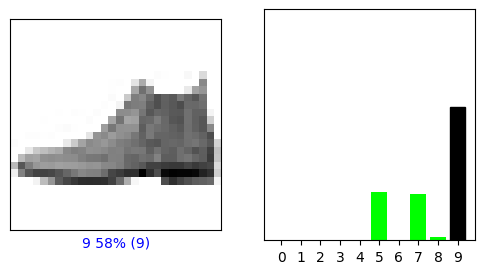

............................................................................
Verificacion...Modelo 2 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

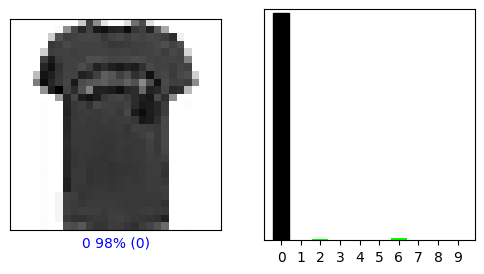

<Figure size 640x480 with 0 Axes>

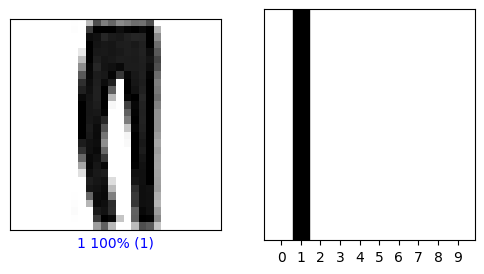

<Figure size 640x480 with 0 Axes>

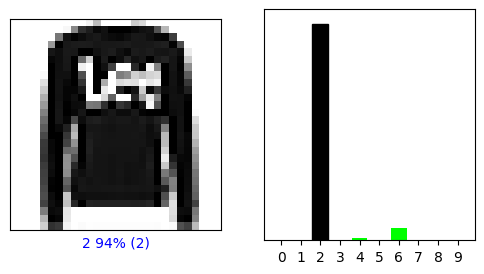

<Figure size 640x480 with 0 Axes>

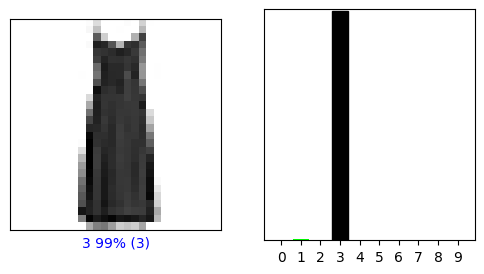

<Figure size 640x480 with 0 Axes>

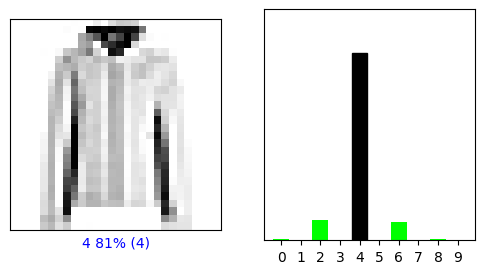

<Figure size 640x480 with 0 Axes>

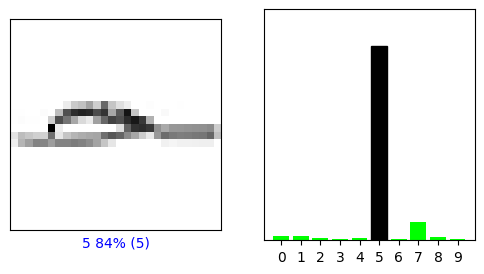

<Figure size 640x480 with 0 Axes>

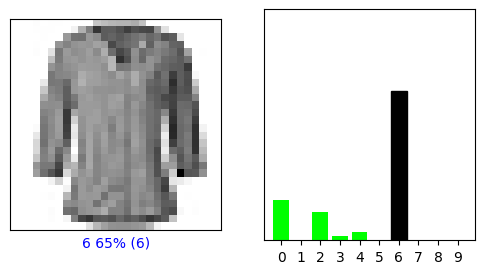

<Figure size 640x480 with 0 Axes>

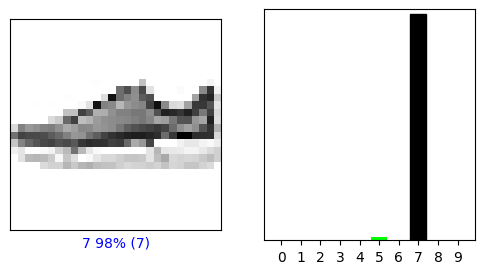

<Figure size 640x480 with 0 Axes>

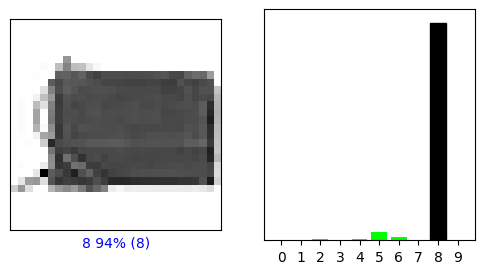

<Figure size 640x480 with 0 Axes>

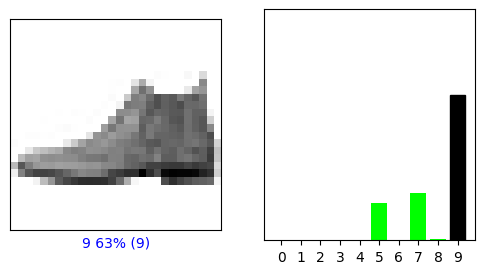

............................................................................
Verificacion...Modelo 3 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

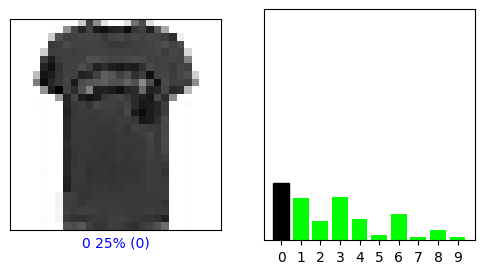

<Figure size 640x480 with 0 Axes>

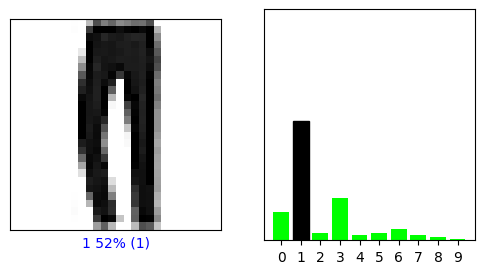

<Figure size 640x480 with 0 Axes>

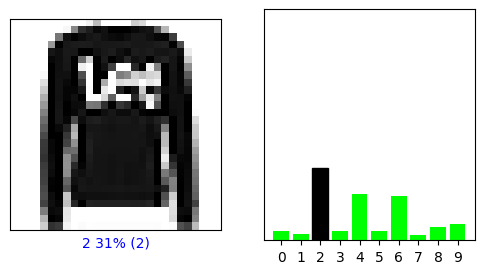

<Figure size 640x480 with 0 Axes>

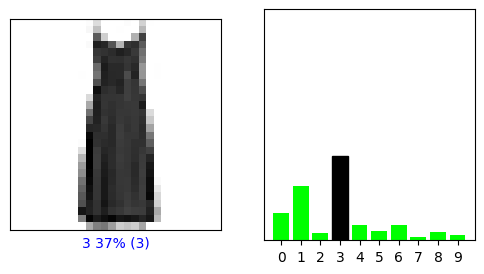

<Figure size 640x480 with 0 Axes>

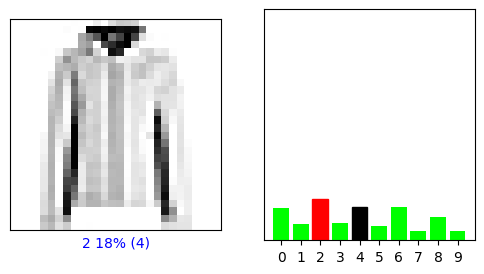

<Figure size 640x480 with 0 Axes>

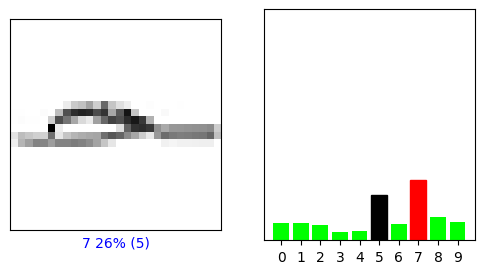

<Figure size 640x480 with 0 Axes>

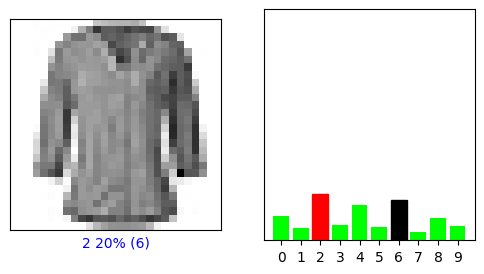

<Figure size 640x480 with 0 Axes>

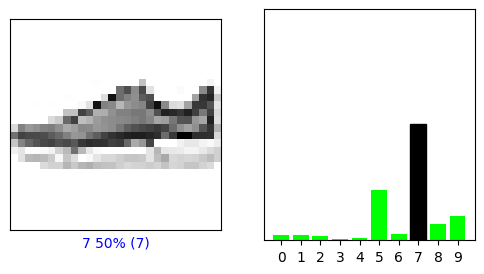

<Figure size 640x480 with 0 Axes>

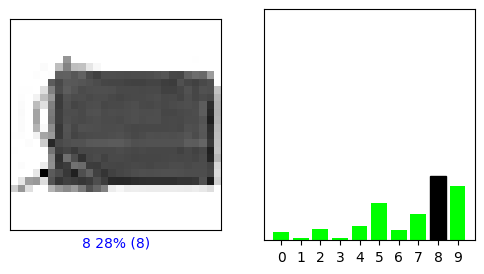

<Figure size 640x480 with 0 Axes>

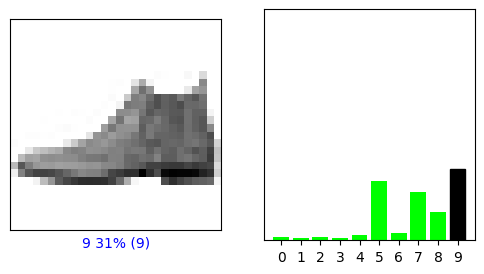

............................................................................
Verificacion...Modelo 4 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

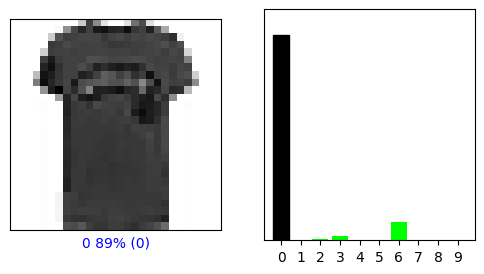

<Figure size 640x480 with 0 Axes>

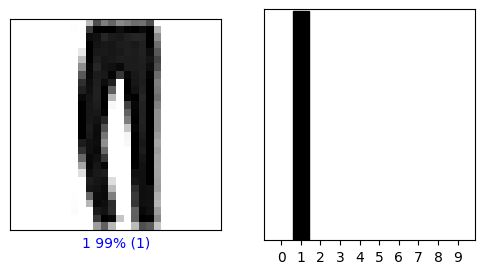

<Figure size 640x480 with 0 Axes>

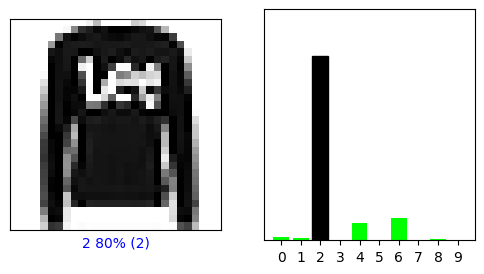

<Figure size 640x480 with 0 Axes>

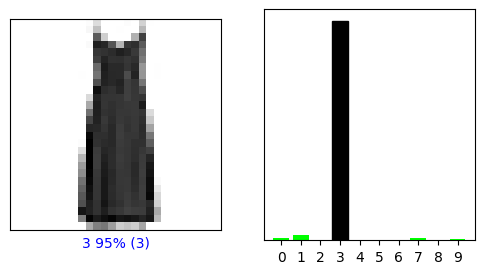

<Figure size 640x480 with 0 Axes>

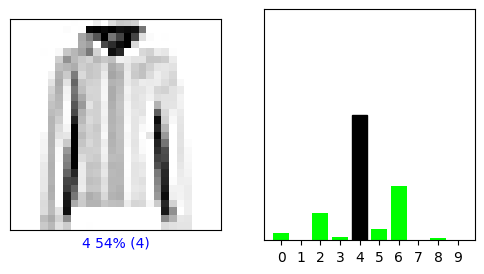

<Figure size 640x480 with 0 Axes>

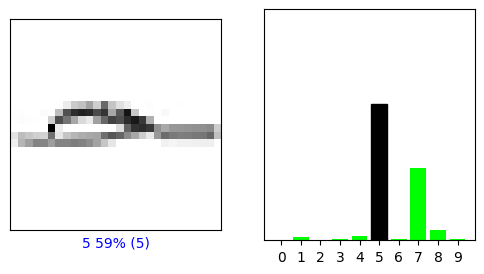

<Figure size 640x480 with 0 Axes>

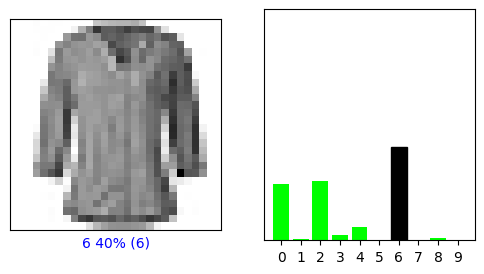

<Figure size 640x480 with 0 Axes>

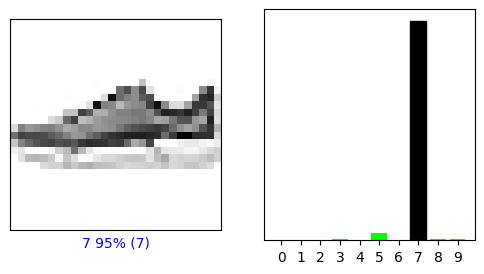

<Figure size 640x480 with 0 Axes>

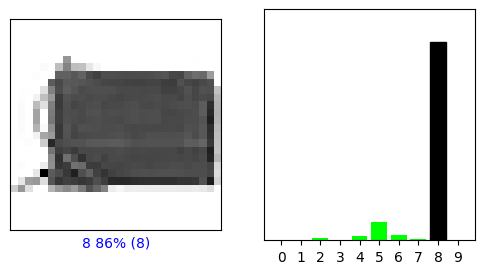

<Figure size 640x480 with 0 Axes>

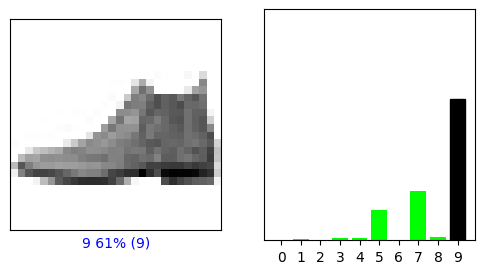

............................................................................
Verificacion...Modelo 5 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

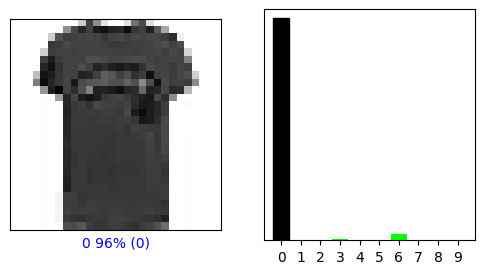

<Figure size 640x480 with 0 Axes>

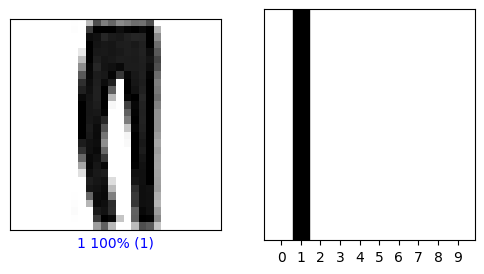

<Figure size 640x480 with 0 Axes>

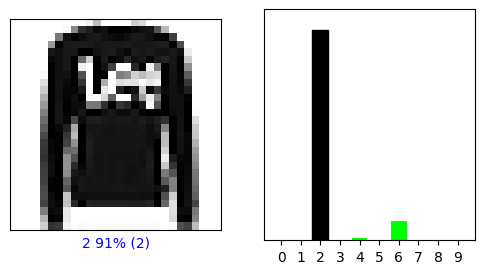

<Figure size 640x480 with 0 Axes>

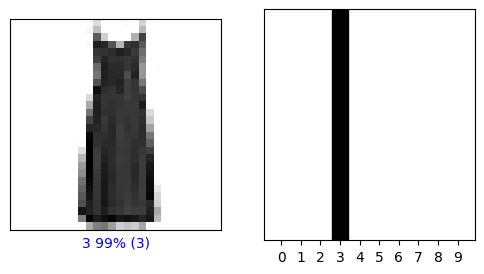

<Figure size 640x480 with 0 Axes>

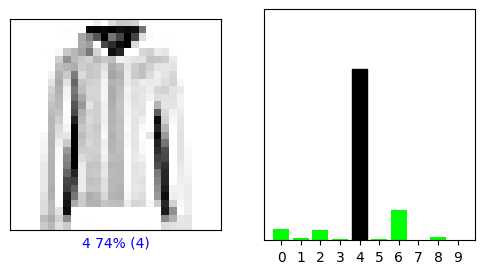

<Figure size 640x480 with 0 Axes>

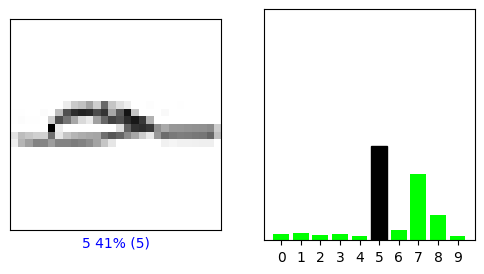

<Figure size 640x480 with 0 Axes>

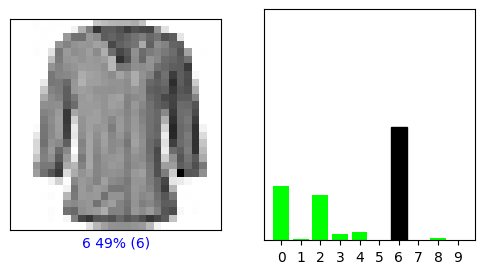

<Figure size 640x480 with 0 Axes>

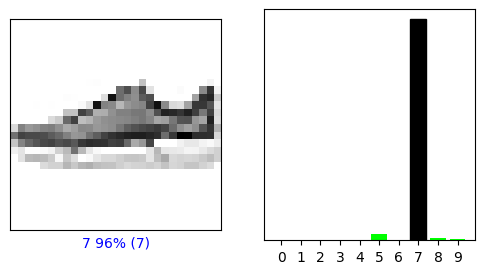

<Figure size 640x480 with 0 Axes>

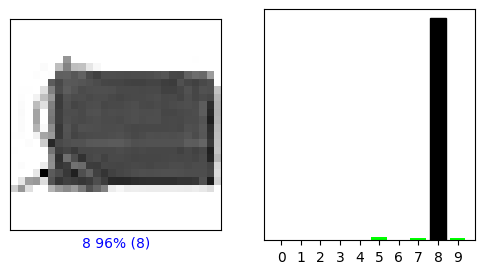

<Figure size 640x480 with 0 Axes>

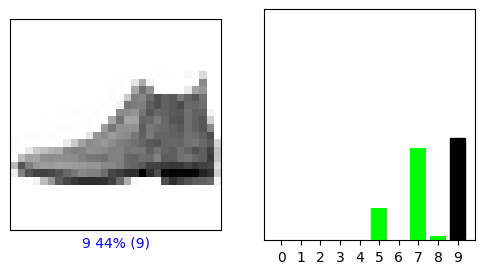

............................................................................
Verificacion...Modelo 6 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

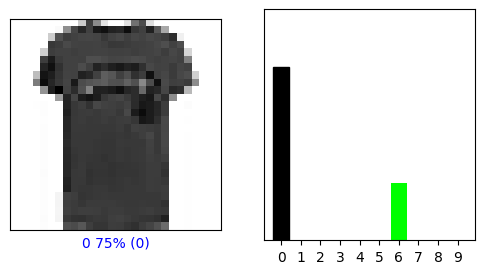

<Figure size 640x480 with 0 Axes>

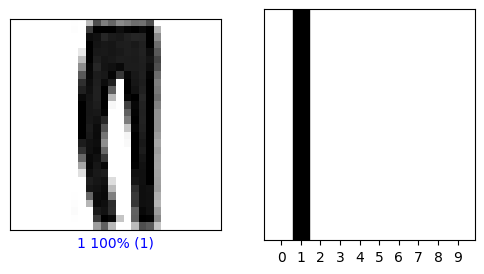

<Figure size 640x480 with 0 Axes>

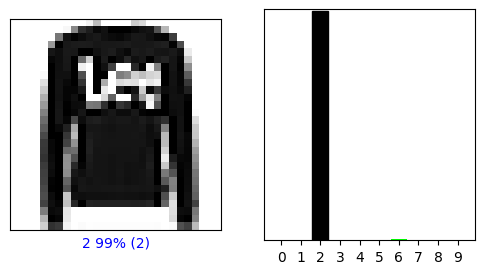

<Figure size 640x480 with 0 Axes>

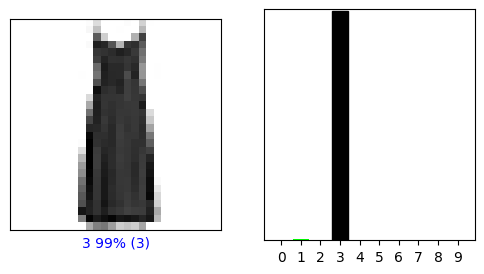

<Figure size 640x480 with 0 Axes>

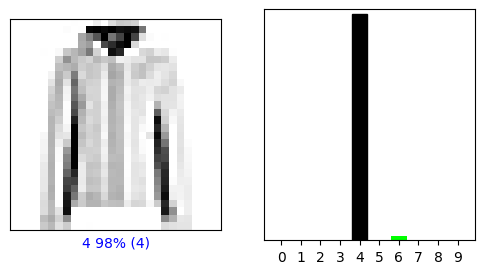

<Figure size 640x480 with 0 Axes>

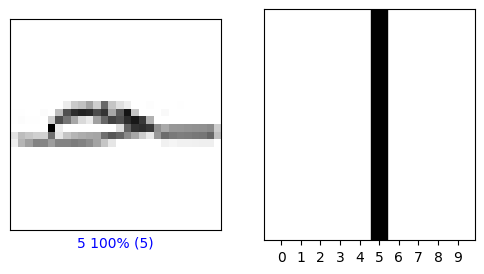

<Figure size 640x480 with 0 Axes>

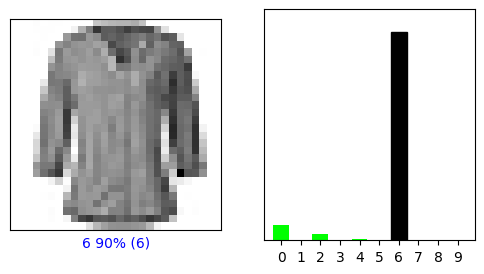

<Figure size 640x480 with 0 Axes>

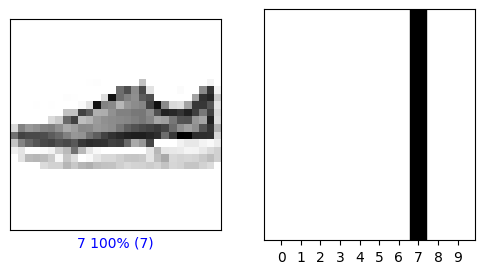

<Figure size 640x480 with 0 Axes>

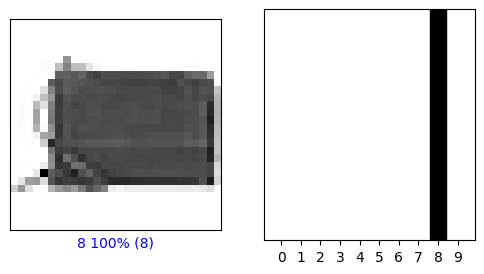

<Figure size 640x480 with 0 Axes>

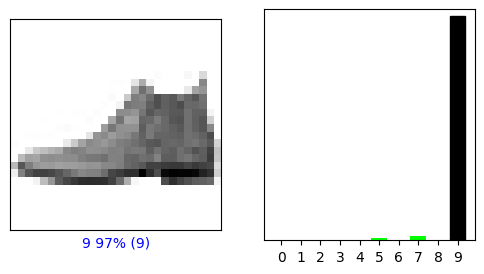

............................................................................
Verificacion...Modelo 7 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

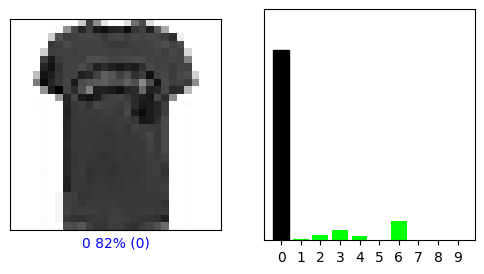

<Figure size 640x480 with 0 Axes>

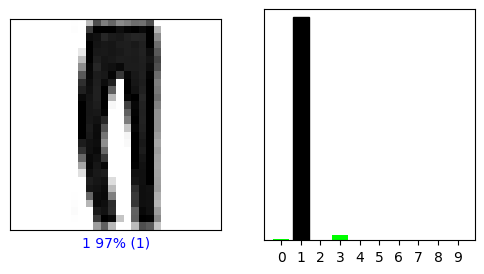

<Figure size 640x480 with 0 Axes>

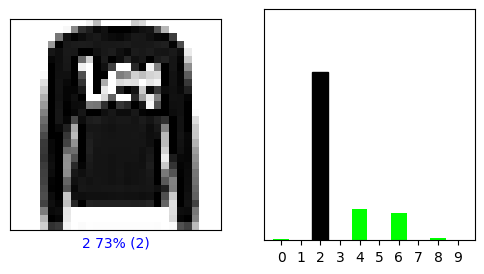

<Figure size 640x480 with 0 Axes>

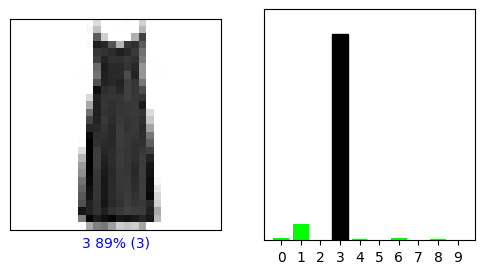

<Figure size 640x480 with 0 Axes>

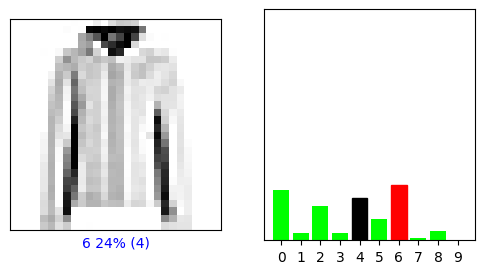

<Figure size 640x480 with 0 Axes>

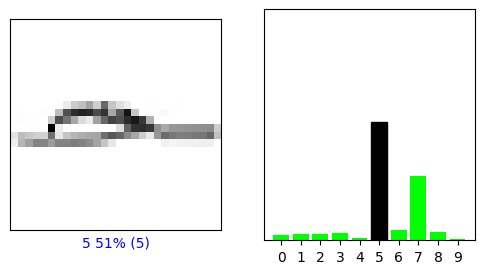

<Figure size 640x480 with 0 Axes>

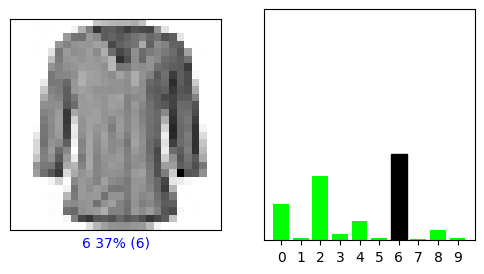

<Figure size 640x480 with 0 Axes>

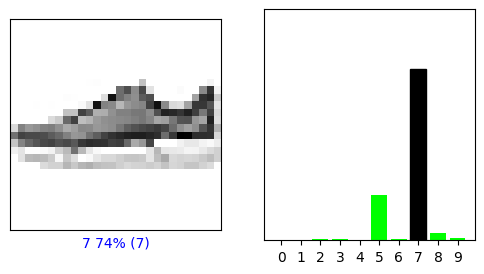

<Figure size 640x480 with 0 Axes>

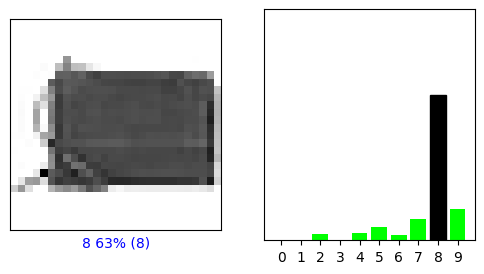

<Figure size 640x480 with 0 Axes>

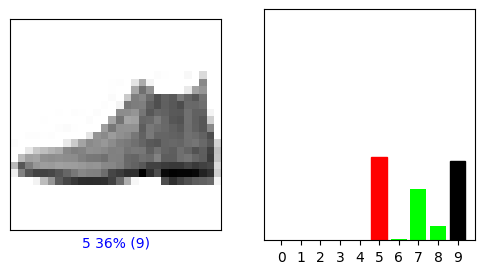

............................................................................
Verificacion...Modelo 8 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

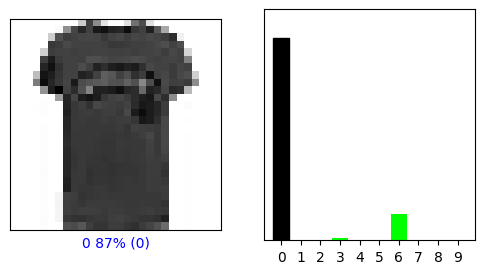

<Figure size 640x480 with 0 Axes>

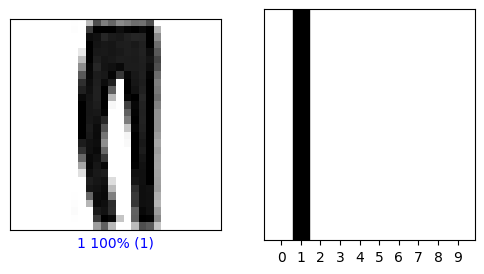

<Figure size 640x480 with 0 Axes>

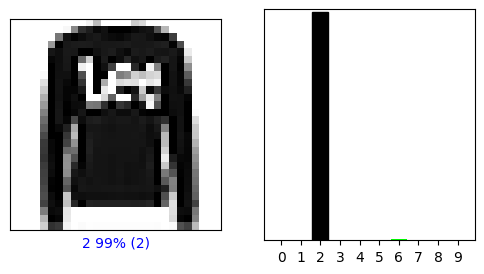

<Figure size 640x480 with 0 Axes>

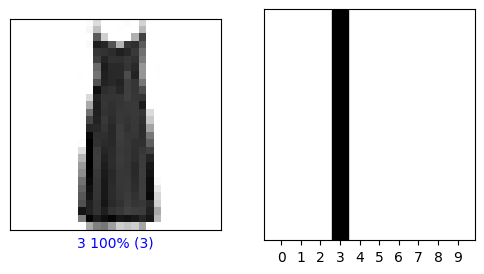

<Figure size 640x480 with 0 Axes>

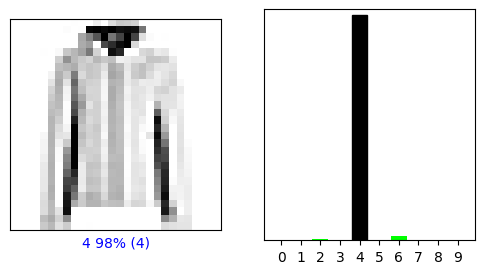

<Figure size 640x480 with 0 Axes>

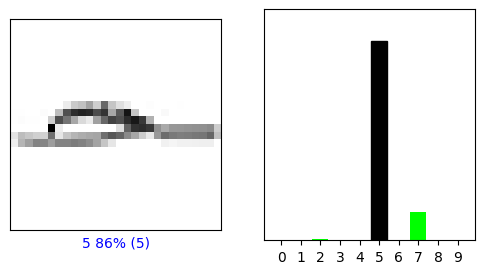

<Figure size 640x480 with 0 Axes>

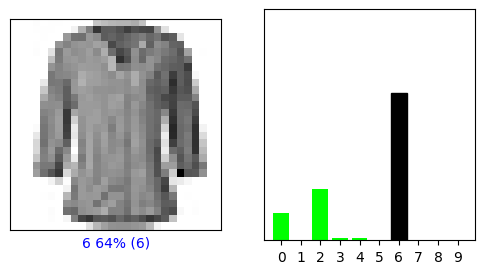

<Figure size 640x480 with 0 Axes>

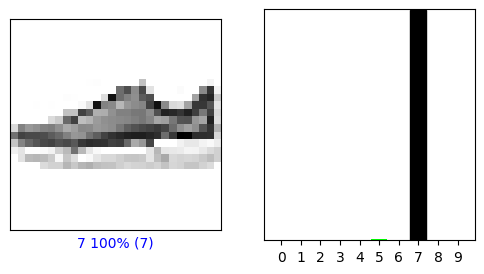

<Figure size 640x480 with 0 Axes>

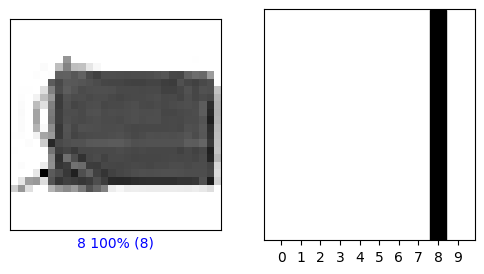

<Figure size 640x480 with 0 Axes>

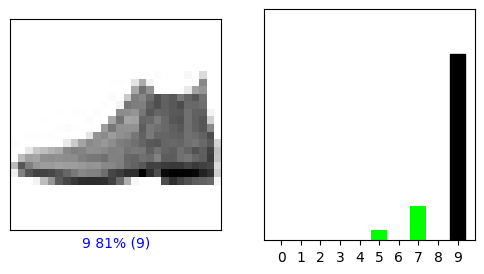

<Figure size 640x480 with 0 Axes>

In [23]:
#identificar las posiciones de los 10 tipos de etiqueta
tiposPrendas = [0]*10
for i in range(0,10):
  tiposPrendas[i] = np.where(y_test == i)[0][0]


for i in range(0,cantidadModelos):
    print("............................................................................")
    print("Verificacion...Modelo",i+1,".........................................................")
    print("............................................................................")

    prediciones = zalandoX[i].predict(test_images)

    for j in tiposPrendas:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(j, prediciones[j], y_test, test_images.reshape(10000,28,28))
        plt.subplot(1,2,2)
        plot_value_array(j, prediciones[j],  y_test)
        plt.show()
        plt.clf()

Las conclusiones que podemos extraer son las siguientes:


1.   El modelo fue entrenado en la pasada ocasión y se observa un incremento en la precisión de los pantalones, decido al conocimiento previo que ha adquirido.
2.   Las camisas se asemejan considerablemente a las chaquetas, camisetas y suéteres, lo que las hace susceptibles a la posibilidad de ser confundidas por el modelo de red neuronal.
3. Las sandalias presentan más dificultades para ser reconocidas por el modelo debido a su menor superficie, lo que propicia su confusión con botas y zapatillas de manera más sencilla.
4.  La imagen 6 ilustra claramente la representatividad de los modelos para otras imágenes, siendo la mayor diferencia evidente entre los casos 4 y 5.

En la tabla sigueinte se podrán observar la representación de las conclusiones extraidas para cada modelo y prenda.

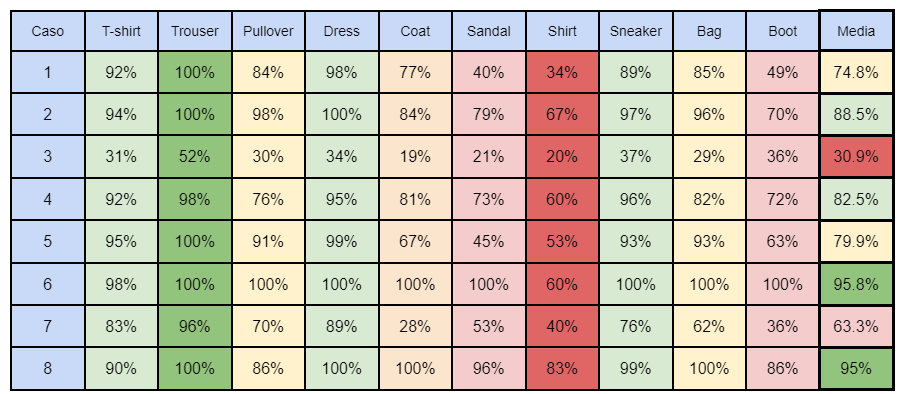

# 10 primeras imágenes

Se llevará a cabo un estudio para evaluar el rendimiento de los ocho modelos en relación a los **diez primeros elementos** de las imágenes de prueba. Estos elementos consisten en 1 Bota, 1 Sweater, 3 Camisetas, 2 Camisas, 1 Abrigo, 1 Sandalia y 1 Deportiva. El objetivo de este estudio es analizar cómo los modelos se desempeñan en la clasificación de estos elementos específicos dentro de las imágenes de evaluación.


............................................................................
Verificacion...Modelo 1 .........................................................
............................................................................
313/313 [==============================] - 0s 2ms/step


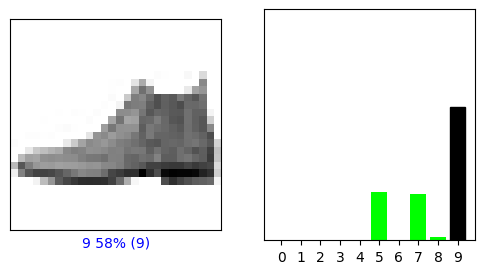

<Figure size 640x480 with 0 Axes>

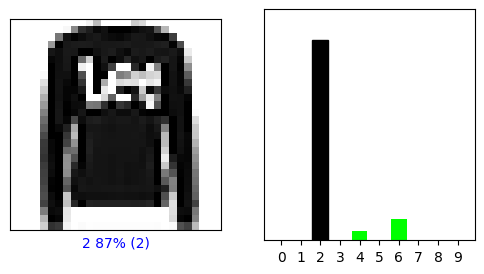

<Figure size 640x480 with 0 Axes>

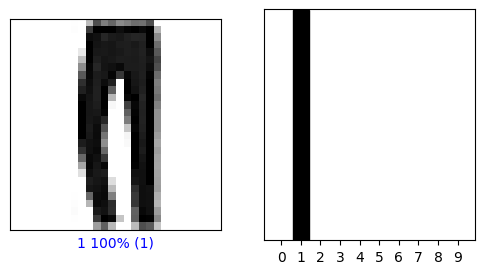

<Figure size 640x480 with 0 Axes>

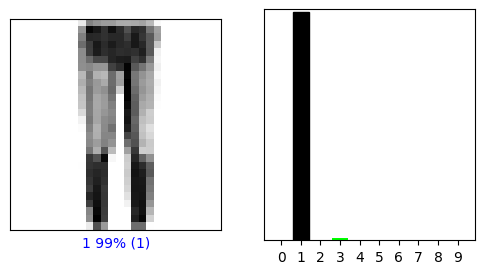

<Figure size 640x480 with 0 Axes>

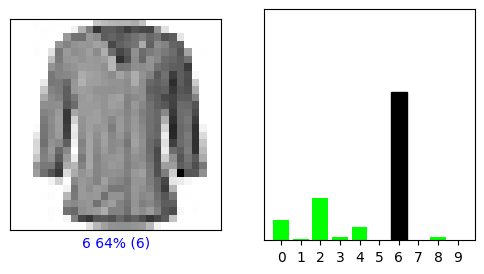

<Figure size 640x480 with 0 Axes>

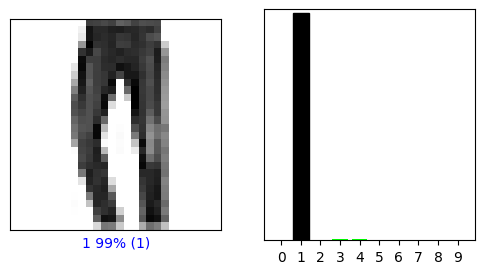

<Figure size 640x480 with 0 Axes>

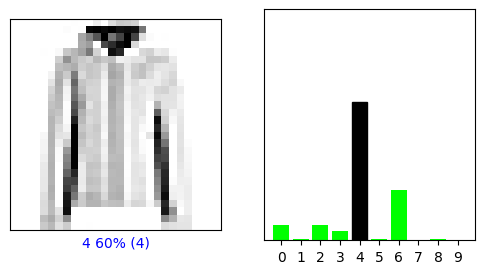

<Figure size 640x480 with 0 Axes>

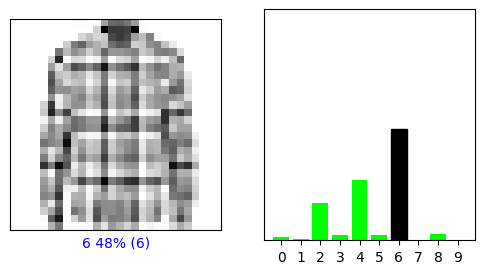

<Figure size 640x480 with 0 Axes>

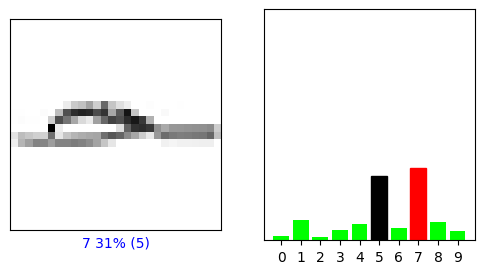

<Figure size 640x480 with 0 Axes>

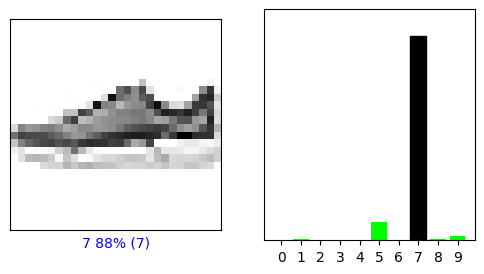

............................................................................
Verificacion...Modelo 2 .........................................................
............................................................................
313/313 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

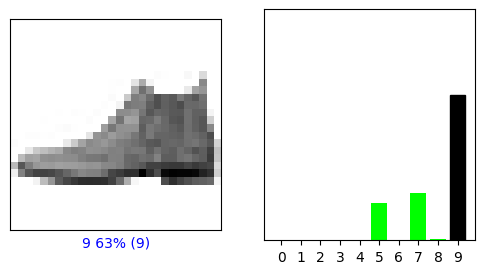

<Figure size 640x480 with 0 Axes>

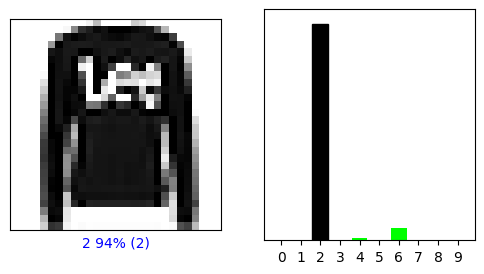

<Figure size 640x480 with 0 Axes>

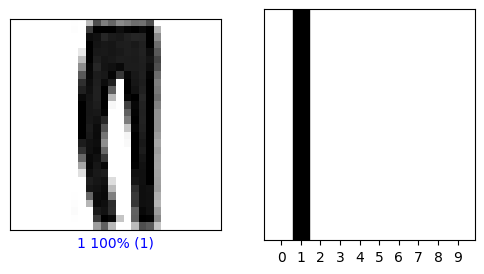

<Figure size 640x480 with 0 Axes>

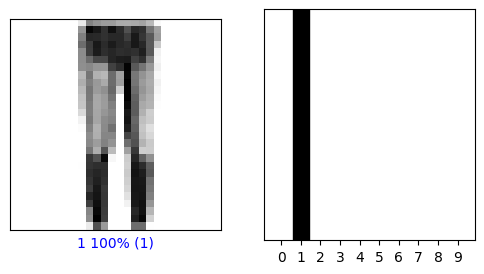

<Figure size 640x480 with 0 Axes>

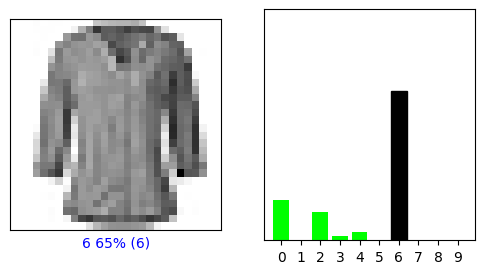

<Figure size 640x480 with 0 Axes>

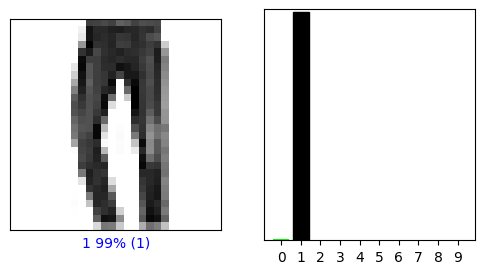

<Figure size 640x480 with 0 Axes>

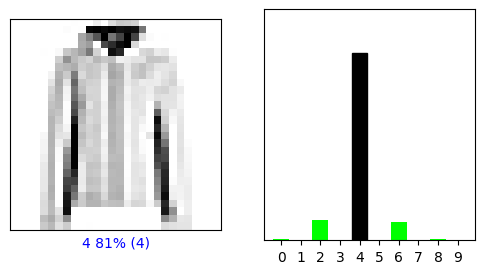

<Figure size 640x480 with 0 Axes>

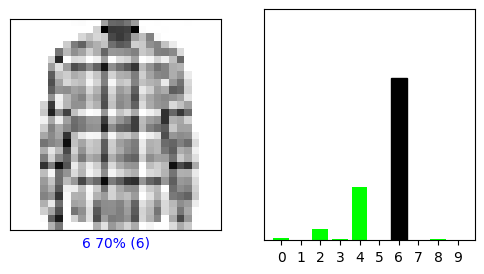

<Figure size 640x480 with 0 Axes>

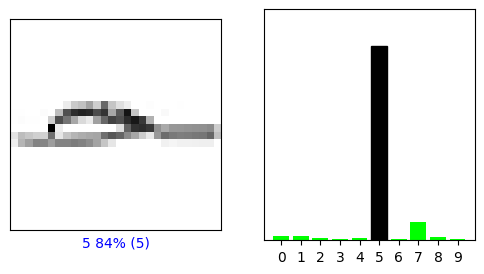

<Figure size 640x480 with 0 Axes>

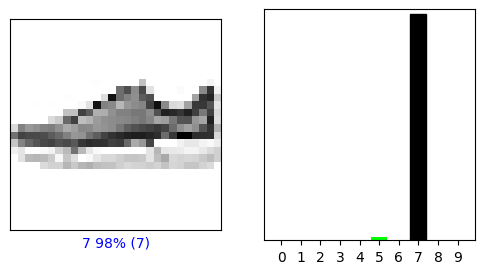

............................................................................
Verificacion...Modelo 3 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

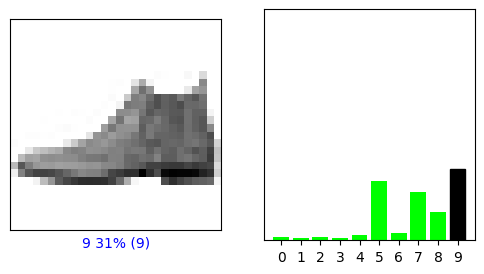

<Figure size 640x480 with 0 Axes>

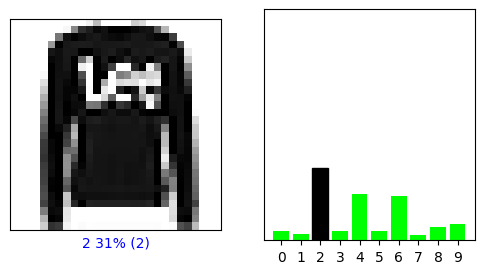

<Figure size 640x480 with 0 Axes>

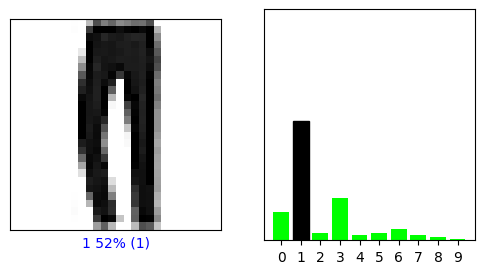

<Figure size 640x480 with 0 Axes>

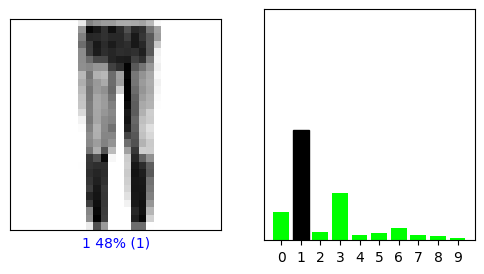

<Figure size 640x480 with 0 Axes>

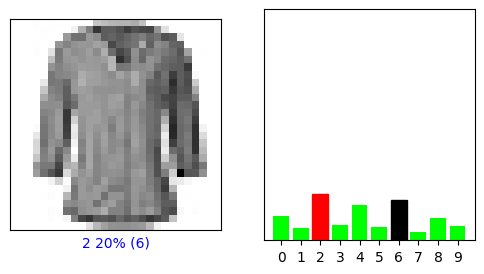

<Figure size 640x480 with 0 Axes>

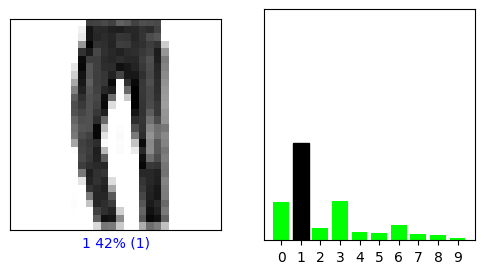

<Figure size 640x480 with 0 Axes>

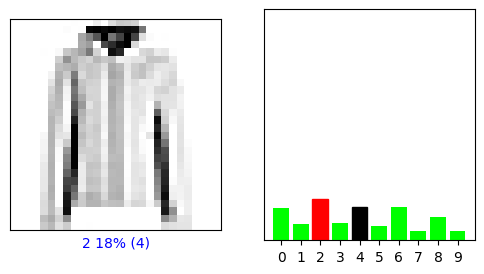

<Figure size 640x480 with 0 Axes>

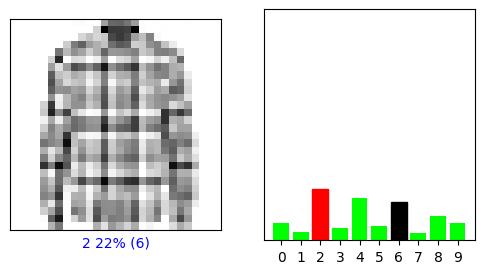

<Figure size 640x480 with 0 Axes>

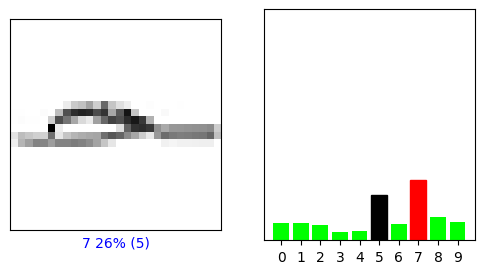

<Figure size 640x480 with 0 Axes>

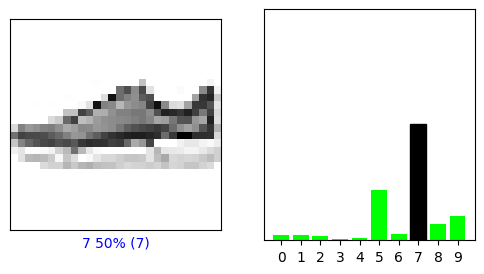

............................................................................
Verificacion...Modelo 4 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

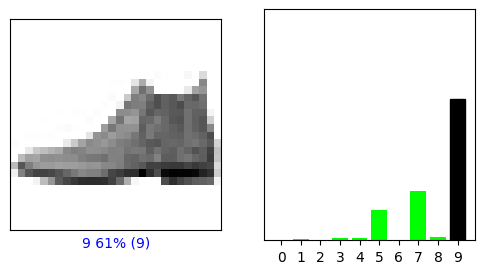

<Figure size 640x480 with 0 Axes>

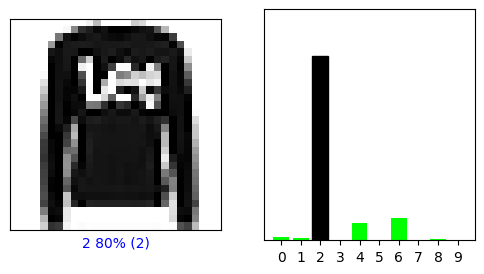

<Figure size 640x480 with 0 Axes>

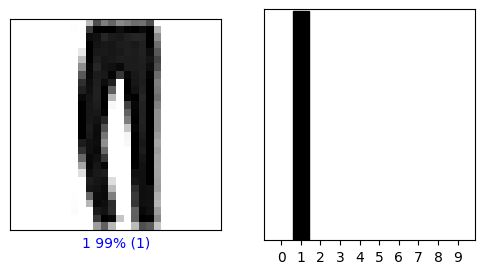

<Figure size 640x480 with 0 Axes>

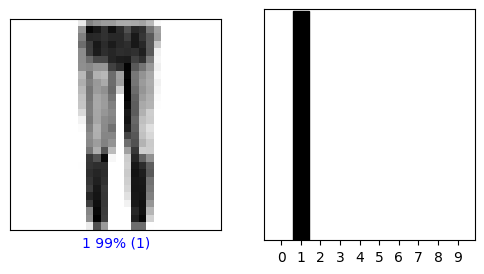

<Figure size 640x480 with 0 Axes>

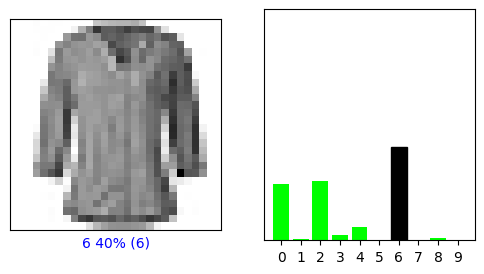

<Figure size 640x480 with 0 Axes>

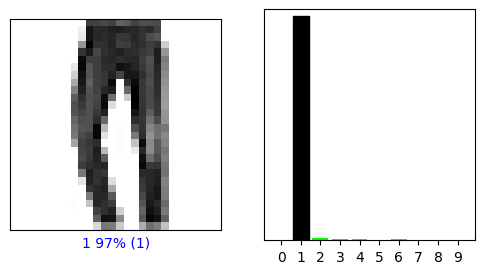

<Figure size 640x480 with 0 Axes>

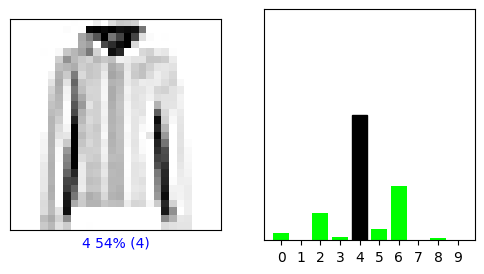

<Figure size 640x480 with 0 Axes>

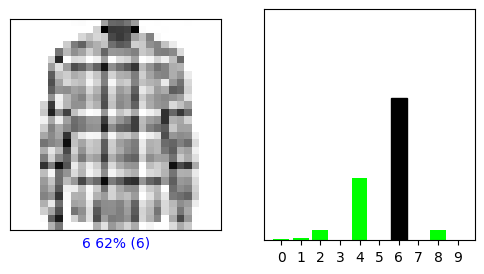

<Figure size 640x480 with 0 Axes>

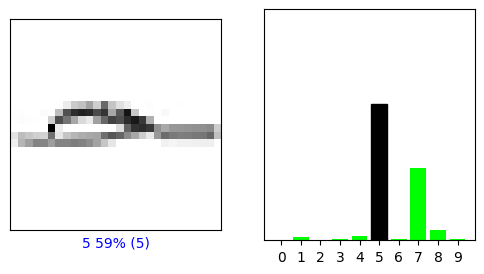

<Figure size 640x480 with 0 Axes>

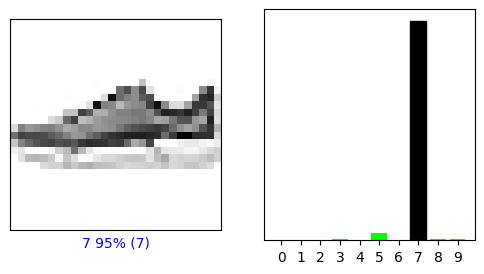

............................................................................
Verificacion...Modelo 5 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

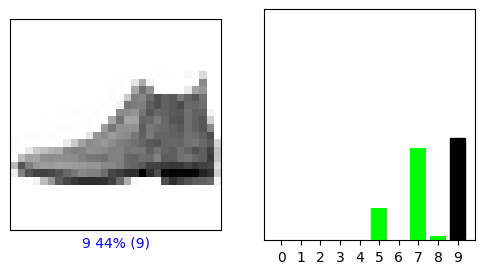

<Figure size 640x480 with 0 Axes>

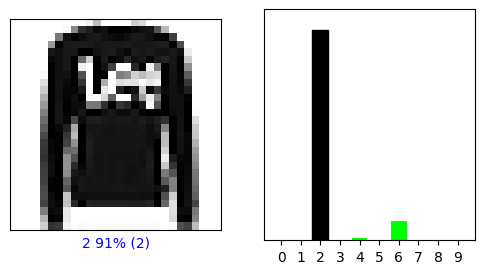

<Figure size 640x480 with 0 Axes>

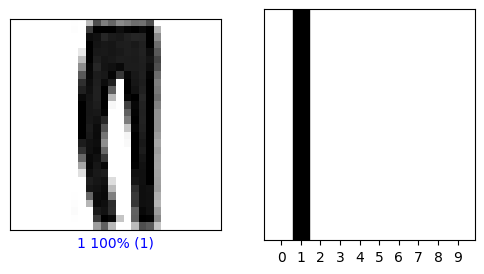

<Figure size 640x480 with 0 Axes>

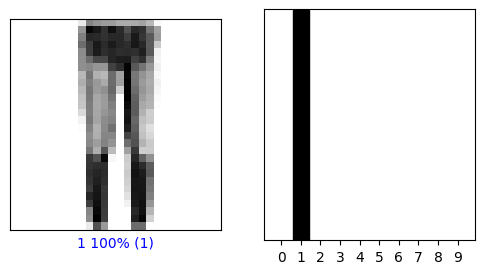

<Figure size 640x480 with 0 Axes>

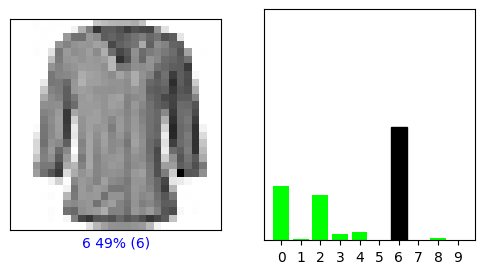

<Figure size 640x480 with 0 Axes>

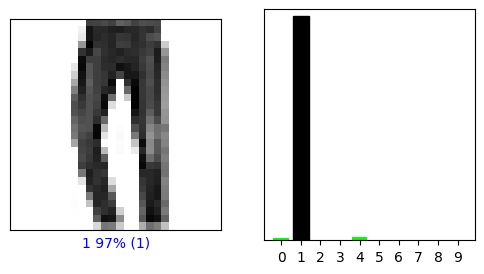

<Figure size 640x480 with 0 Axes>

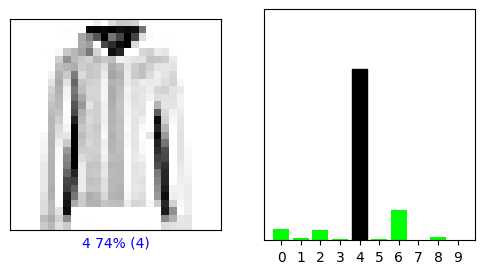

<Figure size 640x480 with 0 Axes>

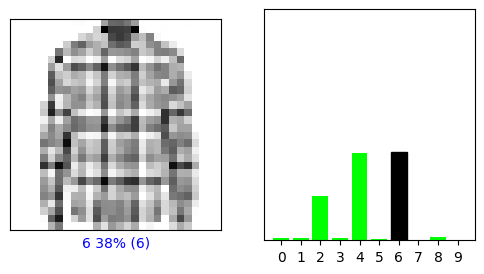

<Figure size 640x480 with 0 Axes>

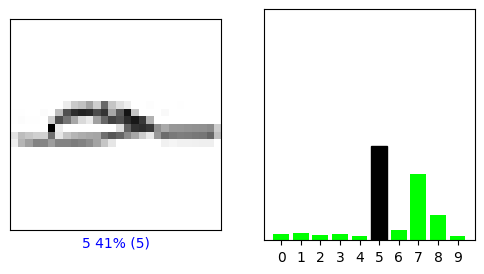

<Figure size 640x480 with 0 Axes>

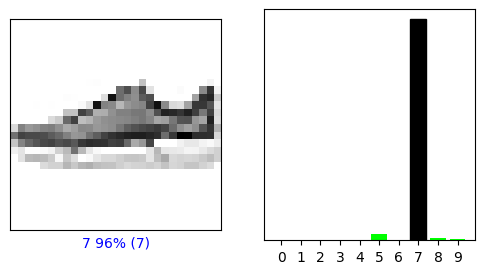

............................................................................
Verificacion...Modelo 6 .........................................................
............................................................................
313/313 [==============================] - 1s 3ms/step


<Figure size 640x480 with 0 Axes>

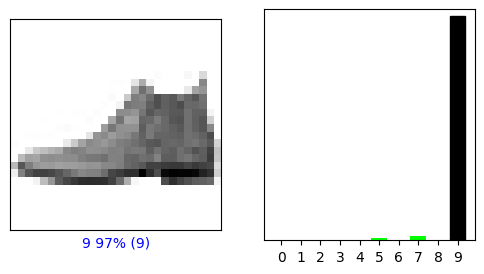

<Figure size 640x480 with 0 Axes>

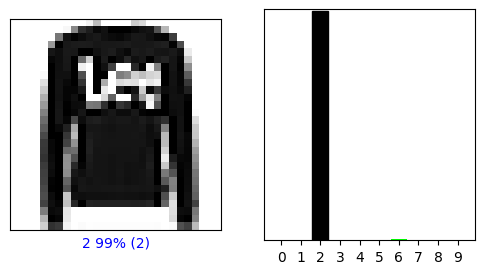

<Figure size 640x480 with 0 Axes>

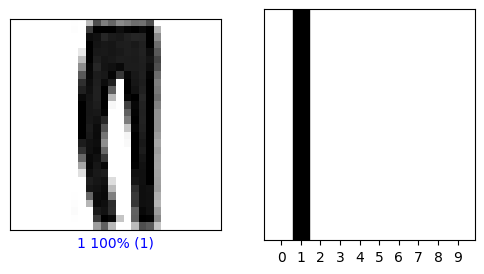

<Figure size 640x480 with 0 Axes>

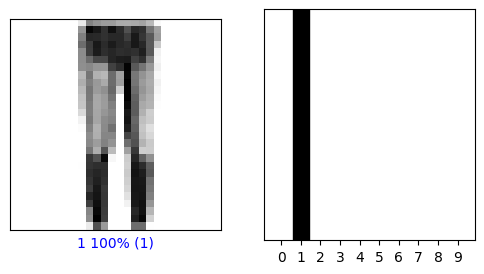

<Figure size 640x480 with 0 Axes>

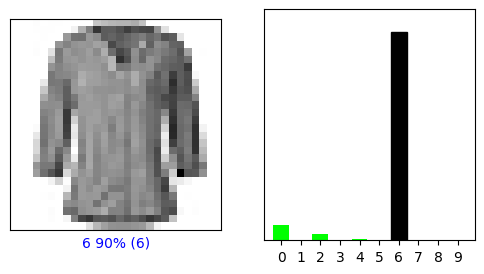

<Figure size 640x480 with 0 Axes>

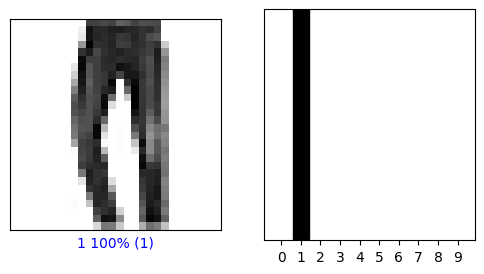

<Figure size 640x480 with 0 Axes>

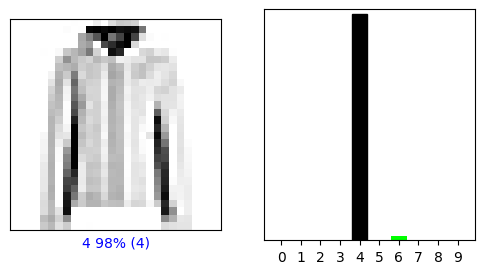

<Figure size 640x480 with 0 Axes>

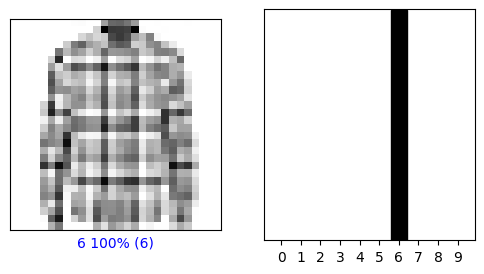

<Figure size 640x480 with 0 Axes>

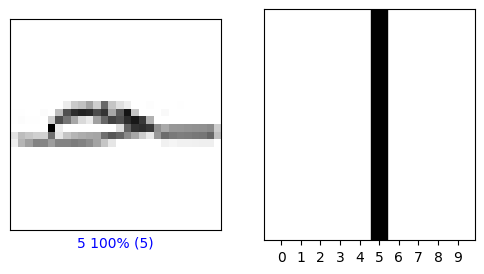

<Figure size 640x480 with 0 Axes>

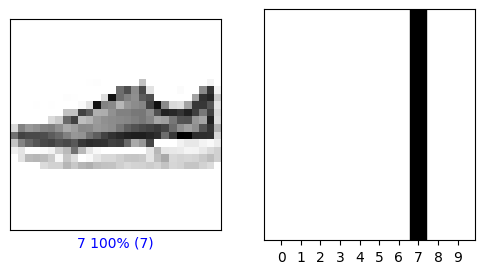

............................................................................
Verificacion...Modelo 7 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

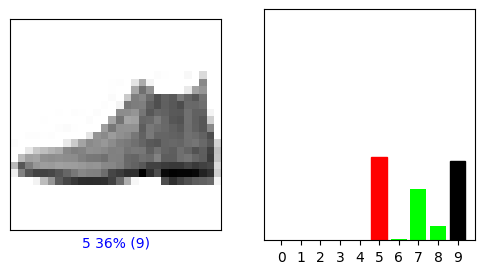

<Figure size 640x480 with 0 Axes>

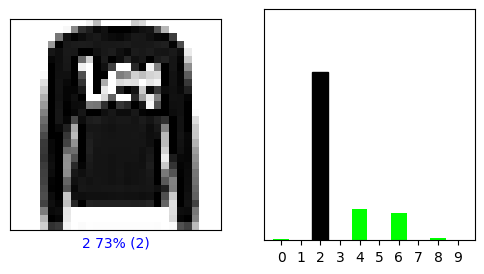

<Figure size 640x480 with 0 Axes>

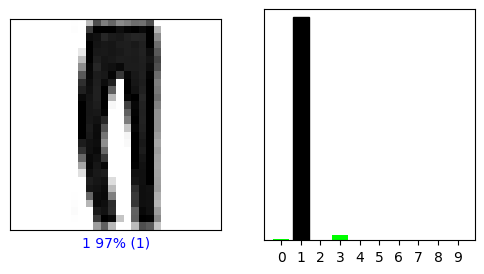

<Figure size 640x480 with 0 Axes>

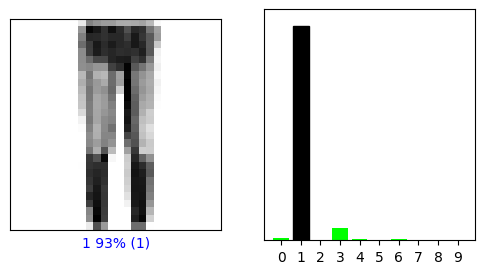

<Figure size 640x480 with 0 Axes>

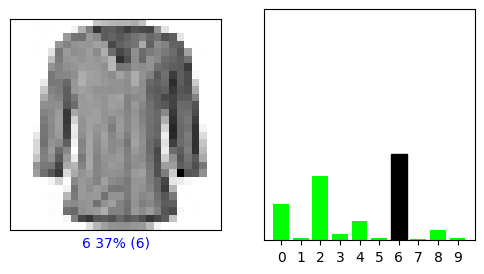

<Figure size 640x480 with 0 Axes>

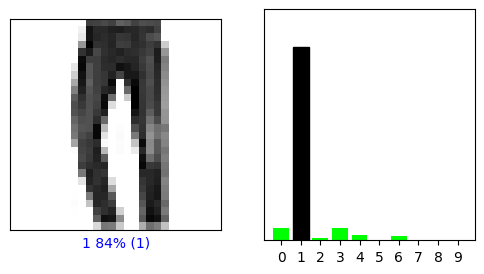

<Figure size 640x480 with 0 Axes>

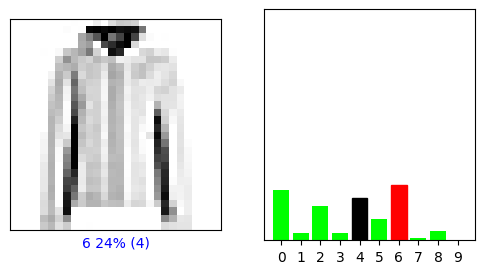

<Figure size 640x480 with 0 Axes>

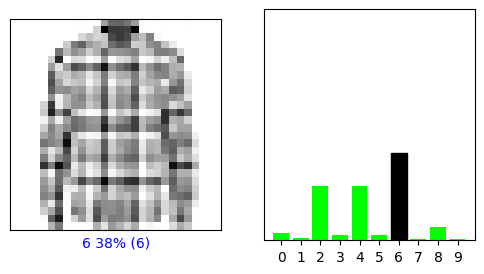

<Figure size 640x480 with 0 Axes>

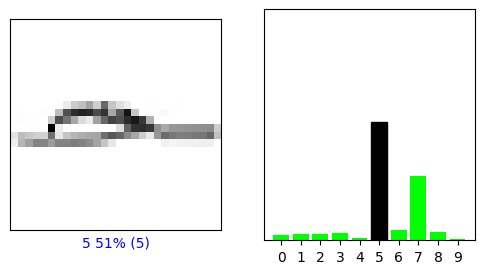

<Figure size 640x480 with 0 Axes>

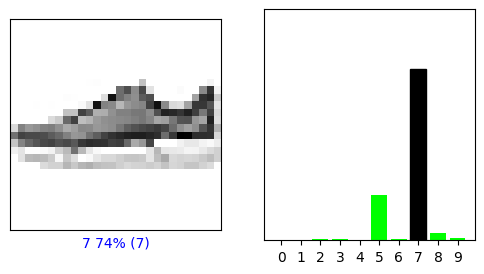

............................................................................
Verificacion...Modelo 8 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

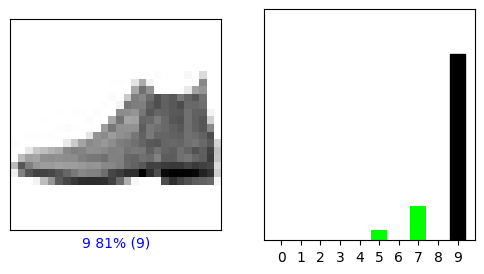

<Figure size 640x480 with 0 Axes>

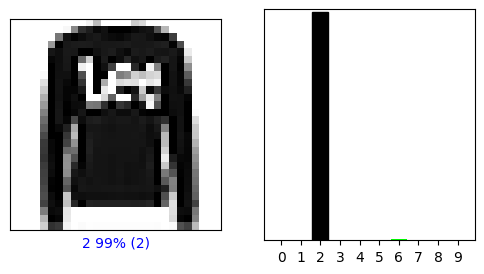

<Figure size 640x480 with 0 Axes>

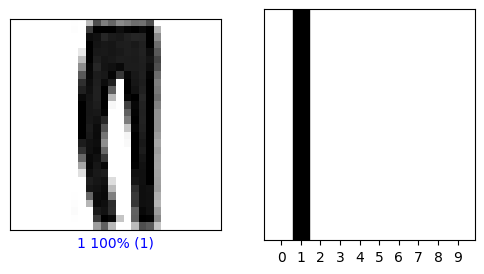

<Figure size 640x480 with 0 Axes>

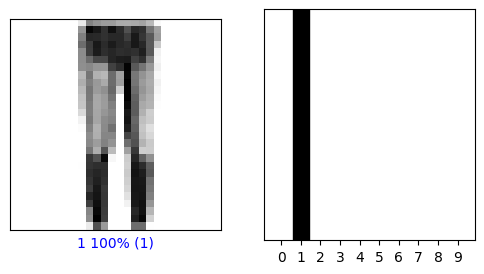

<Figure size 640x480 with 0 Axes>

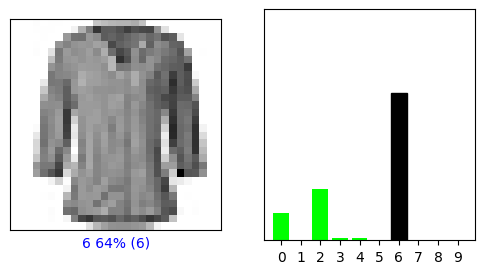

<Figure size 640x480 with 0 Axes>

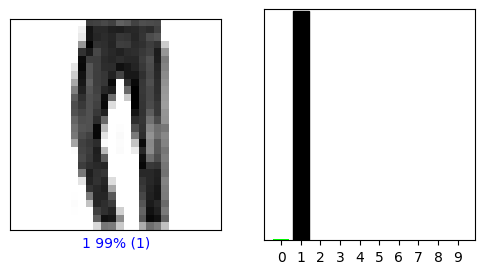

<Figure size 640x480 with 0 Axes>

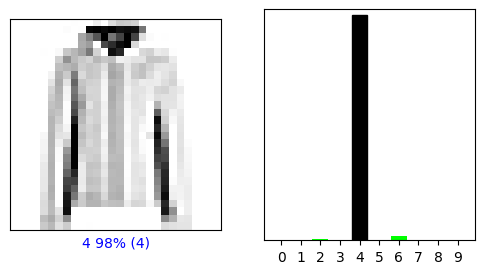

<Figure size 640x480 with 0 Axes>

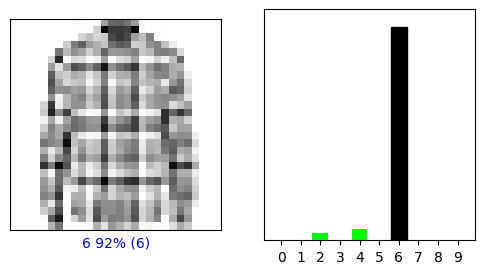

<Figure size 640x480 with 0 Axes>

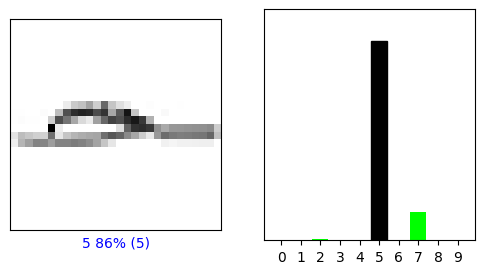

<Figure size 640x480 with 0 Axes>

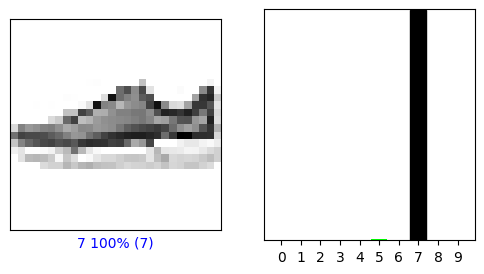

<Figure size 640x480 with 0 Axes>

In [24]:
for i in range(0,cantidadModelos):
    print("............................................................................")
    print("Verificacion...Modelo",i+1,".........................................................")
    print("............................................................................")

    prediciones = zalandoX[i].predict(test_images)

    for j in range(0,10):
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(j, prediciones[j], y_test, test_images.reshape(10000,28,28))
        plt.subplot(1,2,2)
        plot_value_array(j, prediciones[j],  y_test)
        plt.show()
        plt.clf()

Según la tabla anterior, podemos destacar que los modelos más efectivos en la selección de estas prendas son contundentemente el modelo 6 y el modelo 8, ya que logran un nivel de acierto superior al 0.9. Por otro lado, es evidente el pobre rendimiento del modelo 3, que no alcanza ni siquiera el valor mínimo del 0.5.

También es interesante observar que algunas prendas son más fáciles de identificar que otras. En particular, los elementos 1, 2, 3, 5 y 9, que corresponden a sweaters (1), pantalones (2, 3 y 5) y deportivas (9), son más sencillos de identificar en comparación con las botas(0), las camisas(4 y 7), los abrigos (6) y las sandalias (8). Esto puede deberse a **características visuales distintivas** en estas prendas que los modelos pueden reconocer con mayor facilidad.


Este fenómeno puede ser teóricamente deducido a través del análisis de la **similitud visual** al examinar las formas características de las diferentes categorías de prendas. En particular, las deportivas y las chanclas a menudo comparten características visuales que las hacen ocupar una zona similar en el espacio de características, lo que puede llevar a confusiones entre ellas. En contraste, las botas, debido a su mayor altura, presentan diferencias visuales distintivas, lo que las hace menos propensas a la confusión.

Además, las camisas y los abrigos también tienden a solaparse en el espacio de características, ya que comparten características similares en la zona de la parte superior del cuerpo. En contraste, las camisetas, al carecer de mangas, presentan una diferencia distintiva en su forma, lo que facilita su identificación.

Finalmente, los sweaters suelen carecer de elementos que ocupen la misma zona que otras prendas, lo que los hace relativamente fáciles de identificar en comparación con las prendas que pueden superponerse en términos de características visuales.

El análisis teórico de la similitud visual entre las formas de las prendas de vestir arroja luz sobre las posibles fuentes de confusión entre las categorías, lo que puede ser útil para comprender y abordar los desafíos en la clasificación de estas prendas.

Además, los modelos de predicción hacen uso de su habilidad de **generalización** al enfocarse en características comunes y omitir detalles específicos de los datos de entrada. En este contexto, cuando las prendas, como las deportivas y las chanclas, comparten una región de píxeles similar en la imagen, el modelo tiende a pasar por alto las diferencias internas y, como resultado, su capacidad para diferenciar entre ellas disminuye, lo que puede llevar a confusiones en la clasificación.

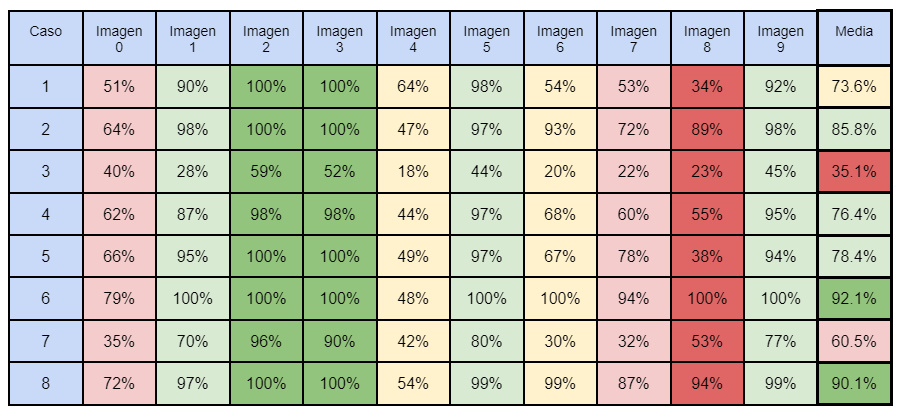

# **Analisis modelos 2 y 7**
Ahora aumentaremos en los modelos 2 y 7 las epocas para que en vez de recorrer los datos 5 veces, lo haga 25. Dado que estos modelos ya han captado el conocimiento de las primeras 5 épocas, simplemente les proporcionaremos 20 épocas adicionales para continuar mejorando su rendimiento.

In [25]:
epocas = 20
print("----------------Modelo",2,"--------------------------------------------------------")
zalandoX[1].fit(train_images, train_labels, epochs=epocas, batch_size=128)
print("----------------Modelo",7,"--------------------------------------------------------")
zalandoX[6].fit(train_images, train_labels, epochs=epocas, batch_size=128)

----------------Modelo 2 --------------------------------------------------------
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8541
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8561
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8583
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8614
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3984 - accuracy: 0.8622
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3937 - accuracy: 0.8622
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8647
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8658
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3821 - accuracy: 0.8673
Epoch 10/20
469/46

In [26]:
# EVALUAMOS LOS NUEVOS MODELOS
zalandoX[1].evaluate(test_images, test_labels)
zalandoX[6].evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5347 - accuracy: 0.8100


[0.5346957445144653, 0.8100000023841858]

Observamos que la implementación de 20 épocas adicionales afecta de manera distinta a ambos modelos. Aunque ambos experimentan un incremento en sus índices de eficacia, este aumento **no es uniforme**.

El Modelo 2 mejora de 0.82 a 0.84, lo cual representa un avance relativamente pequeño en relación al número de épocas adicionales. Su tasa de aciertos en las imágenes de entrenamiento es del 0.87, lo que sugiere que el modelo está comenzando a mostrar signos de **sobreentrenamiento** y ya no puede aprender más de las imágenes proporcionadas.

Por otro lado, el Modelo 7 muestra un aumento más significativo, pasando de 0.74 a 0.81. Su tasa de aciertos en los datos de entrenamiento se sitúa en 0.82, lo que se acerca mucho a la eficacia en la evaluación. Esto sugiere que el Modelo 7 podria aún no haber alcanzado el punto de sobreentrenamiento y podría **seguir aprendiendo** de las imágenes proporcionadas.

# **Mejora del Modelo**
**Adam** (Adaptive Moment Estimation) es un **algoritmo de optimización** que fusiona las virtudes de los algoritmos Momentum (SGD con Momentum) y RMSprop, dando lugar a una mejora en el proceso de aprendizaje del modelo. En sintonía con Momentum, incorpora el uso de una **media móvil** para atenuar las oscilaciones excesivas en los valores del gradiente durante el proceso de entrenamiento. Paralelamente, toma prestado de RMSprop la capacidad de **adaptar de manera dinámica el tamaño del paso**, lo que permite acelerar o desacelerar el proceso de entrenamiento en función de la magnitud del gradiente en cada una de las iteraciones

Adam ha ganado una gran popularidad en el ámbito del aprendizaje profundo gracias a su capacidad para lograr una **convergencia rápida** en una amplia gama de problemas de optimización. Su fortaleza radica en su adaptabilidad para ajustar las tasas de aprendizaje de manera independiente para diferentes parámetros del modelo.

Por otro lado, **sparse_categorical_crossentropy** es una **funcion de perdida** hermanada con la funcion categorical_crossentropy. Ambas desempeñan un papel fundamental en la clasificación multiclase en el ámbito del aprendizaje profundo. Ambas funciones realizan una predicción del modelo basada en múltiples salidas para cada ejemplo, interpretándolas como las **probabilidades de pertenencia** a las distintas clases.

La distinción clave entre las dos radica en la **representación de las etiquetas**. Mientras que categorical_crossentropy espera etiquetas codificadas en **formato one-hot**, sparse_categorical_crossentropy acepta etiquetas representadas como **números enteros**. Esta diferencia es significativa, ya que sparse_categorical_crossentropy demanda considerablemente menos carga computacional al utilizar un número entero en lugar de un vector en formato one-hot. Por esta razón, sparse_categorical_crossentropy se convierte en la elección preferida en problemas de clasificación con un **elevado número de clases**, contribuyendo a una **eficiencia computacional** notable.

In [27]:
# SE CAMBIAN EL OPTIMIZADOR A 'Adam' Y LA FUNCIÓN PERDIDA A 'sparse_categorical_crossentropy'
zalandoX[2].compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam', metrics=['accuracy'])

In [28]:
# ENTRENAMOS EL NUEVO MODELO
print("Mejora...Modelo",3,".........................................................")
zalandoX[2].fit(train_images, y_train, epochs=5, batch_size=128)

Mejora...Modelo 3 .........................................................
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9983 - accuracy: 0.7230
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7168 - accuracy: 0.7820
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5924 - accuracy: 0.8138
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5258 - accuracy: 0.8298
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4874 - accuracy: 0.8380


In [29]:
# EVALUAMOS EL NUEVO MODELO
print("Evaluacion...Modelo",3,".........................................................")
zalandoX[2].evaluate(test_images, y_test)

Evaluacion...Modelo 3 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.5057 - accuracy: 0.8268


[0.5057306289672852, 0.8267999887466431]

Después de haber sometido a un nuevo proceso de entrenamiento y posterior evaluación, el modelo 3 ha sido reevaluado empleando 5 épocas de entrenamiento con el optimizador Adam y la función de pérdida sparse_categorical_crossentropy, en lugar de sus originales sigmoid y sgd. Este enfoque permite llevar a cabo un análisis comparativo en relación con su version original, con el fin de profundizar en la comprensión de los resultados obtenidos en este modelo recientemente evaluado.

La función de pérdida **sparse_categorical_crossentropy**, en comparación con su contraparte categorical_crossentropy, no modifica los resultados de predicción, pero ofrece un **ahorro significativo en recursos computacionales**. Esto se debe a que sparse_categorical_crossentropy utiliza un 10% de la memoria requerida por categorical_crossentropy al almacenar las categorías para cada elemento en el conjunto de datos.

Por otra parte, es importante destacar que el optimizador **Adam** sí genera cambios notables en la predicción. A pesar de que Adam incorpora técnicas de optimización tanto del SGD (Descenso de Gradiente Estocástico) como del RMSprop, no siempre supera a estas alternativas. En general, Adam se emplea con mayor frecuencia debido a su capacidad destacada de convergencia y su habilidad para manejar conjuntos de datos voluminosos.

En nuestro escenario particular, el modelo 3 obtiene un **gran aumento de eficacia** en las 5 epocas. En los modelos iniciales el modelo 3 era considerablemente el peor de ellos no llegando ni siquiera a superar el 0.7 de acierto. En cambio, al aplicarle el optimizador Adam consigue llegar a una cifra superior al 0.8, siendo una mejora considerable en el modelo.

# **Conclusiones:**

Tras llevar a cabo un exhaustivo análisis de todos los modelos disponibles, podemos a la conclusión de cuál es el sistema más adecuado para lograr un modelo óptimo en la tarea de clasificación multiclase de prendas de ropa.

Para empezar, es importante destacar que los modelos 1, 2, 3 y 4 son esencialmente equivalentes a los modelos 5, 6, 7 y 8, respectivamente, con la única diferencia de la **cantidad de neuronas** en la capa oculta, que varía de 10 a 512. Tras analizar detenidamente los resultados de la evaluación, se hace evidente que los modelos con 512 neuronas en la capa oculta muestran un aumento significativo en su eficacia en comparación con los modelos que tienen solo 10 neuronas. Este incremento es especialmente notorio en los modelos 1 y 3, que inicialmente tenían una precisión más baja.

Además, también se ha realizado un análisis de la **función de activación** óptima para la tarea de clasificación. En este contexto, los modelos 1, 2, 4 y 5 se comparan con los modelos 3, 4, 7 y 8, siendo la única diferencia el tipo de función de activación utilizada: los primeros emplean ReLu, mientras que los segundos utilizan sigmoid. Los resultados indican claramente que los modelos que utilizan la función ReLu funcionan de manera más efectiva que los que emplean sigmoid.

Esta diferencia en eficacia se hace especialmente evidente al comparar los modelos 1 y 3, así como los modelos 5 y 7. Además, es importante destacar que estos modelos comparten el uso del optimizador sgd (Descenso estocástico del gradiente), lo que sugiere que la función de activación ReLu se complementa mucho mejor con sgd que la función sigmoid.

Desde una perspectiva teórica, esta diferencia se puede explicar por el comportamiento de las funciones de activación. El optimizador **sgd** se basa en las **pendientes de las funciones**, y si los datos no son adecuados, puede producir **saturación**, lo que conduce a problemas de desvanecimiento del gradiente. La función sigmoid muestra saturación temprana en sus extremos, con una derivada cercana a cero, mientras que la función ReLU no se satura en el lado positivo, manteniendo una derivada constante de 1. Por lo tanto, la falta de saturación de ReLu explica por qué es considerablemente mejor que sigmoid al utilizar el optimizador sgd.

En el último análisis realizado, se evaluó cuál es el **optimizador** más adecuado para esta tarea. Se emparejaron los modelos de la siguiente manera: los modelos 1, 3, 5 y 7 utilizaron el optimizador sgd, mientras que los modelos 2, 4, 6 y 8 emplearon RMSprop. Los resultados demuestran de manera clara que los modelos que utilizan RMSprop son significativamente más eficientes que aquellos que emplean sgd.

Estos hallazgos indican que, en el contexto de esta tarea de clasificación multiclase de prendas de ropa, el optimizador RMSprop supera al optimizador sgd en términos de eficacia. Elegir el optimizador adecuado es crucial para garantizar un rendimiento óptimo en el entrenamiento y la convergencia del modelo, y estos resultados respaldan la preferencia por RMSprop en este escenario específico.

Uniendo todas estas conclusiones, se puede afirmar que el modelo ideal para la clasificación de imágenes de prendas de ropa sería aquel que cuente con **512 neuronas** en la capa oculta, utilice la función de activación **ReLu** y el optimizador **RMSprop**. En este contexto, el modelo 6 cumple con todas estas características, lo que lo convierte en la elección óptima para esta tarea de clasificación de prendas de ropa.

# **Trabajo en equipo:**
En el proyecto, la división del trabajo no fue completa, ya que **todos colaboramos** en todas las partes a través de videollamadas y reuniones en personas. Inicialmente, **Sandra y Natalia** se encargaron del **código** (la creación de los modelos, entrenamiento y verificación de los mismos), mientras que **Ángel** contribuyó resolviendo **problemas específicos**, como la corrección de una expresión errónea (28,28 en lugar de 28*28).

Después, de haber creado la lista que contiene los 8 modelos y haber entrenado cada uno de ellos. Decidimos repartir las tareas: **Ángel** investigó acerca el optimizador **Adam** y la función de error **sparse_categorical_crossentropy** asi como su implementación en el modélo 3. **Sandra** invetigo acerca la creación de **gráficos y tablas**, y de la **generación de predicciones** de todos los apartados, a su vez realizó la investigación sobre la teoría de los **hiperparámetros** de la capa oculta para estudiar la diferencia de cada modelo, y **Natalia** realizó la **explicación teórica** de los **apartados**: carga de datos, arquitectura y representación de la red neuronal, y preparación de los datos.

Para poder realizar todo el trabajo en equipo sin ninguna complicación, cremos dos subapartados de **preguntas** y de **mejoras**.

Posteriormente, nos reunimos para **compartir** y consolidar la información, **complementando la teoría** con diversas fuentes y reforzándola con los conceptos estudiados en clase.